# ICW2 B: Classification

#### Declaration

1. I have read and understood the University regulations relating to academic offences, including collusion and plagiarism: 
http:/Awww.qub.ac.uk/directorates/AcademicStudentAffairs/AcademicAffairs/GeneralRegulations Procedures/ProceduresforDealingwithAcademicOffences/ 
2. The submission is my own original work and no part of it has been submitted for any other assignments, except as otherwise permitted. 
3. All sources used, published or unpublished, have been acknowledged. 
4. I give my consent for the work to be scanned using a plagiarism detection software.

#### Package preperation:

In [29]:
import pandas as pd
import numpy as np
from collections import Counter #Data types and collection tools
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler #Normalisation
from sklearn.svm import SVC #classification model
from sklearn import metrics #For evaluating model performance and calculating various performance metrics
from sklearn.decomposition import PCA #dimensional reduce
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #classification model
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold, cross_val_predict# For model selection, hyperparameter tuning and cross-validation in machine learning
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc #For evaluating the performance of classification models
import warnings
warnings.filterwarnings('ignore') #Making the warning section invisible makes the code more concise.
from ipywidgets import interact, fixed

introduction:

## Data Preparation and Preprocessing

read csv file

In [5]:
dataset = pd.read_csv('CSC3062_ICW2_111223.csv', index_col=0)
dataset #Print dataset to identify any abvious problems

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Subgroup
TCGA.EA.A5FO.CESC.C1_,11.261819,11.379974,5.988242,9.164248,9.062340,9.207241,5.339287,8.213901,9.076765,2.731314,...,5.606682,1.664255,0.519944,10.857895,10.190282,10.796575,1.202700,0.000000,0.000000,C1
TCGA.AA.A01T.COAD.C1_,10.147796,7.952462,7.381714,7.976996,10.343450,10.804346,5.473417,6.222936,7.618992,5.437540,...,6.247698,3.828679,1.830518,9.615375,7.919930,12.872789,10.662325,1.688305,0.000000,C1
TCGA.KC.A7FD.PRAD.C1_,10.216831,10.656550,9.044271,5.430994,9.160002,10.122207,5.136216,7.252486,7.913799,7.219788,...,7.468893,3.103162,2.371893,10.760919,8.456560,11.556693,3.982437,0.000000,0.000000,C1
TCGA.AA.A01Q.COAD.C1_,10.770791,10.690684,7.575370,8.823033,9.890358,10.906200,6.790478,7.617613,7.935031,8.860756,...,8.710493,4.631294,-0.238944,10.183048,9.279192,11.461029,9.536476,-0.603803,0.133147,C1
TCGA.B6.A0WT.BRCA.C1_,10.479123,12.430928,7.835861,9.394133,8.123796,8.252268,7.446256,7.923417,8.277073,8.698854,...,10.128110,2.850999,0.697329,10.738320,9.082250,11.330161,7.708767,0.000000,0.000000,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.JY.A93D.ESCA.C6_,9.943998,13.472256,11.739232,10.620988,7.787384,8.092836,8.308647,8.552258,6.924443,10.222076,...,11.707285,8.204262,0.775463,10.141665,8.739421,12.044031,5.364718,0.000000,0.063687,C6
TCGA.SC.AA5Z.MESO.C6_,9.895428,12.611421,9.433850,10.527350,9.080905,9.607303,9.201977,8.983886,8.015460,9.137373,...,10.150712,8.759019,0.000000,10.536189,7.821206,12.641928,8.718697,0.000000,3.583170,C6
TCGA.2J.AABH.PAAD.C6_,9.830369,12.767771,9.891185,9.868511,8.996233,9.781942,9.674549,8.472057,7.215756,10.565873,...,9.857715,4.168811,0.000000,10.766769,7.260534,12.727108,4.168811,2.298629,0.000000,C6
TCGA.86.6562.LUAD.C6_,9.327699,12.449507,9.771666,10.239706,8.935940,8.854909,9.546156,9.771666,8.033539,10.933875,...,10.377449,2.893692,0.619178,10.467035,8.124737,12.042367,3.176275,0.000000,0.000000,C6


### Exploratory Datasets

In [6]:
dataset.shape  #Print the shape of the df, to deterine the size of the dataset

(774, 441)

In [7]:
print(dataset.keys()) #show key elements

Index(['ACTL6A', 'ADAM9', 'ADAMTS1', 'ADCY7', 'AIMP2', 'ALKBH7', 'ALOX5AP',
       'AMPD3', 'APITD1', 'APOC1',
       ...
       'WIPF1', 'WNT2B', 'WNT8B', 'WSB2', 'ZWILCH', 'ZYX', 'MMP3', 'PLG',
       'RGS8', 'Subgroup'],
      dtype='object', length=441)


In [8]:
dataset.describe() #describe details of the dataset

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WDR77,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,...,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,9.789658,11.168950,9.525284,9.100375,9.029082,9.517517,7.903466,8.228176,7.793210,10.112477,...,9.520644,10.010036,4.707027,1.132334,10.989620,8.123073,11.829274,3.548330,1.444283,0.599114
std,0.883601,1.190477,1.729608,1.146375,0.655638,0.894638,1.879667,1.178285,0.753300,2.298313,...,0.700088,1.141224,1.923172,1.144468,0.560117,1.055414,0.954340,3.477005,3.624984,1.088439
min,6.736659,5.619880,4.461548,5.089235,3.363129,5.172732,1.576571,3.565829,4.440394,2.617083,...,7.611313,5.606682,0.000000,-0.666764,9.224667,5.490150,8.454044,0.000000,-1.882376,0.000000
25%,9.144371,10.506786,8.302622,8.434326,8.625983,8.928784,6.809860,7.626018,7.307925,8.660904,...,9.031311,9.359447,3.414169,0.025350,10.573436,7.337809,11.162802,0.416570,0.000000,0.000000
50%,9.692462,11.218027,9.440489,9.291374,9.026443,9.482785,7.994150,8.316985,7.822165,10.181904,...,9.446818,10.170162,4.494661,0.915635,10.963532,8.089416,11.832054,2.501190,0.000000,0.000000
75%,10.354071,11.925505,10.777197,9.912704,9.407964,10.056478,9.218226,8.943918,8.275852,11.311847,...,9.980967,10.804837,5.671716,1.686018,11.364912,8.908449,12.486242,6.331834,0.598133,0.742609
max,13.184263,14.511364,14.830545,12.316480,11.141667,12.306090,12.332856,12.429383,10.092269,18.900180,...,12.018557,12.687126,11.334798,8.278375,12.705935,10.611772,14.968199,13.508092,16.907372,6.794117


check the head and tail of the dataset

In [6]:
dataset.head()#Examient the first few rows

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Subgroup
TCGA.EA.A5FO.CESC.C1_,11.261819,11.379974,5.988242,9.164248,9.062340,9.207241,5.339287,8.213901,9.076765,2.731314,...,5.606682,1.664255,0.519944,10.857895,10.190282,10.796575,1.202700,0.000000,0.000000,C1
TCGA.AA.A01T.COAD.C1_,10.147796,7.952462,7.381714,7.976996,10.343450,10.804346,5.473417,6.222936,7.618992,5.437540,...,6.247698,3.828679,1.830518,9.615375,7.919930,12.872789,10.662325,1.688305,0.000000,C1
TCGA.KC.A7FD.PRAD.C1_,10.216831,10.656550,9.044271,5.430994,9.160002,10.122207,5.136216,7.252486,7.913799,7.219788,...,7.468893,3.103162,2.371893,10.760919,8.456560,11.556693,3.982437,0.000000,0.000000,C1
TCGA.AA.A01Q.COAD.C1_,10.770791,10.690684,7.575370,8.823033,9.890358,10.906200,6.790478,7.617613,7.935031,8.860756,...,8.710493,4.631294,-0.238944,10.183048,9.279192,11.461029,9.536476,-0.603803,0.133147,C1
TCGA.B6.A0WT.BRCA.C1_,10.479123,12.430928,7.835861,9.394133,8.123796,8.252268,7.446256,7.923417,8.277073,8.698854,...,10.128110,2.850999,0.697329,10.738320,9.082250,11.330161,7.708767,0.000000,0.000000,C1


In [7]:
dataset.tail()#Examient the last few rows

,ACTL6A,ADAM9,ADAMTS1,ADCY7,AIMP2,ALKBH7,ALOX5AP,AMPD3,APITD1,APOC1,...,WIPF1,WNT2B,WNT8B,WSB2,ZWILCH,ZYX,MMP3,PLG,RGS8,Subgroup
TCGA.JY.A93D.ESCA.C6_,9.943998,13.472256,11.739232,10.620988,7.787384,8.092836,8.308647,8.552258,6.924443,10.222076,...,11.707285,8.204262,0.775463,10.141665,8.739421,12.044031,5.364718,0.000000,0.063687,C6
TCGA.SC.AA5Z.MESO.C6_,9.895428,12.611421,9.433850,10.527350,9.080905,9.607303,9.201977,8.983886,8.015460,9.137373,...,10.150712,8.759019,0.000000,10.536189,7.821206,12.641928,8.718697,0.000000,3.583170,C6
TCGA.2J.AABH.PAAD.C6_,9.830369,12.767771,9.891185,9.868511,8.996233,9.781942,9.674549,8.472057,7.215756,10.565873,...,9.857715,4.168811,0.000000,10.766769,7.260534,12.727108,4.168811,2.298629,0.000000,C6
TCGA.86.6562.LUAD.C6_,9.327699,12.449507,9.771666,10.239706,8.935940,8.854909,9.546156,9.771666,8.033539,10.933875,...,10.377449,2.893692,0.619178,10.467035,8.124737,12.042367,3.176275,0.000000,0.000000,C6
TCGA.46.3766.LUSC.C6_,11.117786,12.098970,10.098269,10.147358,8.474233,8.782107,10.967896,9.209446,7.791677,11.021098,...,11.393600,6.477400,0.000000,11.384951,9.384350,12.530433,8.549334,0.000000,0.000000,C6


In [82]:
np.amin(dataset[dataset.columns[0:-1]]) # minimum of the dataset

-1.882376396

In [83]:
np.amax(dataset[dataset.columns[0:-1]]) # maximum of the dataset

20.88508

Looking at the above table of the original data, below are observations I have noted.
1.  The data is seems numerical in nature but need to check. Depending on the sample shown, the range may be between -1.9 and 21 and the range is different for each feature. It may still be beneficial to normalise these data.
2.  Dataset are 441 rows and 774 columns in 6 subgroup
3.  Subgroups are present, and are not numerical in nature, they are strings.
4.  All visible data looks to be non-null, but this needs to be checked for the whole data frame.
5.  Features are in columns
6.  This is a high-dimensional dataset.

Data pre-processing will then be performed based on the observations.

### check datatype

Considering compatibility issues, some operations and algorithms require specific data types. Ensuring that the data types are of the correct type helps prevent errors and ensures compatibility with the intended functions and methods. There will be many operations that can only operate on numeric data, so make sure that the columns associated with the feature are all numeric.

In [9]:
dataset.dtypes

ACTL6A      float64
ADAM9       float64
ADAMTS1     float64
ADCY7       float64
AIMP2       float64
             ...   
ZYX         float64
MMP3        float64
PLG         float64
RGS8        float64
Subgroup     object
Length: 441, dtype: object

Confirmation is in the form of numbers except for the subgroup part.

### duplicates data

Removing duplicates improves data quality as duplicate entries may lead to inaccurate analysis errors. Therefore, deletion of duplicated data improves the accuracy and reliability of the data and thus improves the overall data quality.

In [9]:
# Assuming 'dataset' is an iterable
count_dict = Counter(dataset)
# Check if there are any counts greater than 1
has_duplicates = any(count > 1 for count in count_dict.values())
print(has_duplicates)

False


There is no duplicate data in the dataset

### Hangding imbalanced data

check the imbalanced data: Imbalanced data can lead to poor model performance because when there is class imbalance in the training data, machine learning models tend to disproportionately classify into the larger class due to the increased prior probability. This results in instances belonging to the smaller class being more prone to misclassification compared to instances belonging to the larger class

Class Distribution Summary: Check the distribution of each class in your target variable

Subgroup
C1    129
C2    129
C3    129
C4    129
C5    129
C6    129
Name: count, dtype: int64


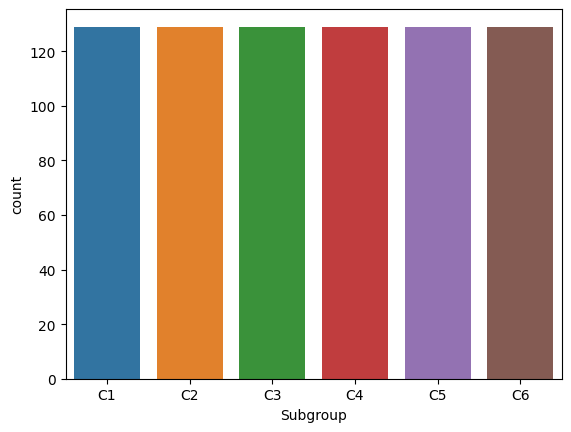

In [10]:
class_distribution = dataset['Subgroup'].value_counts() # count the number of each subclass type
print(class_distribution) # show the result
#visualize the result:
sns.countplot(x='Subgroup', data=dataset)
plt.show()


There are same number of sample for each subgroup

check imbalance ratio

In [11]:
imbalance_ratio = class_distribution.max() / class_distribution.min() #max part / min part to check the balance of the dataset
print(f'Imbalance Ratio: {imbalance_ratio}')

Imbalance Ratio: 1.0


IR value is 1.0 means the dataset is balanced, means the number of classes is the same for all classes, there are no more classes or less classes.

Being able to observe that the sample sizes are the same for each group implies that the data distribution is balanced among the groups. This contributes to better model performance across different categories

### Handing Missing Values

The presence of missing data poses a significant challenge in accurately predicting or modeling outcomes, as the values for the missing data are unknown and cannot be ascertained through observed data. Constructing models on datasets with missing values can lead to biased estimations, complicating the attainment of fair and reliable predictions. Mere deletion of observations with missing data introduces bias into the model, thereby diminishing the generalizability of results beyond the study's specific context. The omission of specific data points undermines the representativeness of the sample, distorting the conclusions derived from the data and impeding the ability to make robust inferences about the overall population.

#### check missing data 

In [12]:
#Get the grand total of all missing value in the dataset. Sum() get the grand total.
#calling sum again gets the grand total
count_of_missing_values = dataset.isna().sum().sum()
f"The dataset has a total of: {count_of_missing_values} missing value"# formal output result

'The dataset has a total of: 0 missing value'

The reslut shows threre is no missing value

### Handing Outliers

Outliers affect statistical measurements, the measure of extreme nuance is greatly affected, and may not accurately represent data concentration trends and dispersion when Outliers are present. Importantly, distorted statistical modelling results can lead to inaccurate predictions and classifications, and some machine learning algorithms are sensitive to Outliers and can produce misleading results.

check outliers

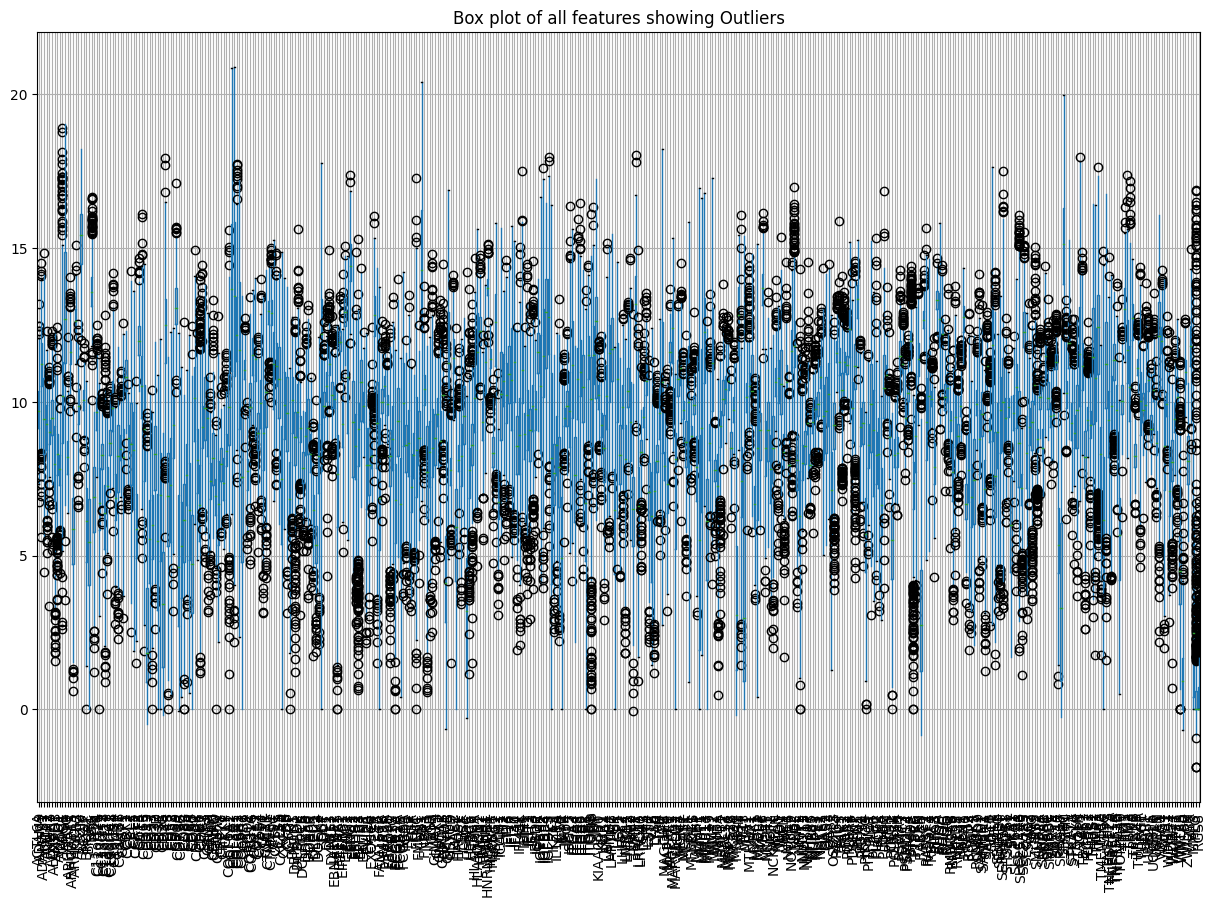

In [10]:
#check outlier in plot by observation
#select the numeric columns to find the outliers -> except the subgroup column
df_numeric = dataset.select_dtypes(include = [np.number])
#show the each numerical column by box plot
plt.figure(figsize=(15,10)) #set the plot size
df_numeric.boxplot()
plt.title('Box plot of all features showing Outliers') #title of the plot
plt.xticks(rotation=90) #display x-axis labels rotated by 90 degrees
plt.show()

Observe the picture, the dots are the outliers, the blue ones are the normal values, it can be seen that the outliers are basically spread all over the features, so we will not only look at the visualisation of each feature, but also look for it directly from the direction of statistics.

statistic the outliers:

In [11]:
#identify function to find the ouliters in dataset 
def find_outliers_IQR(df):
   q1=df.quantile(0.25)#1/4
   q3=df.quantile(0.75)#3/4
   IQR=q3-q1
   df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] =1 #easy to sum how many outliers 
   df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]=0
   return df
outliers = find_outliers_IQR(dataset[dataset.columns[0:-1]])
outliers.sum()


ACTL6A      7.0
ADAM9      20.0
ADAMTS1     2.0
ADCY7      11.0
AIMP2      17.0
           ... 
ZWILCH      0.0
ZYX         5.0
MMP3        0.0
PLG         0.0
RGS8        0.0
Length: 440, dtype: float64

display the outliers contained in each column

Calculate the percentage of Outliers:  
Since this is a high dimensional array, I chose to use Isolation Forest to find outliers. Because in the Isolation Forest algorithm, the samples are considered as a whole.

In [100]:
#count total value
total_values = dataset.shape[0] * dataset.shape[1]
#count total outlier
total_outliers = outliers.sum().sum()
print(f'Total value of Dataset is: {total_values}')
print(f'Total value of outlisers is: {total_outliers}')
print(f'Percentage of Outliers is: {total_outliers  / total_values  * 100}%')

Total value of Dataset is: 341334
Total value of outlisers is: 4826
Percentage of Outliers is: 1.413864426046043%


The proportion of outliers is calculated to be just over 1 per cent.So I think outliers will have a unsignificant impact.

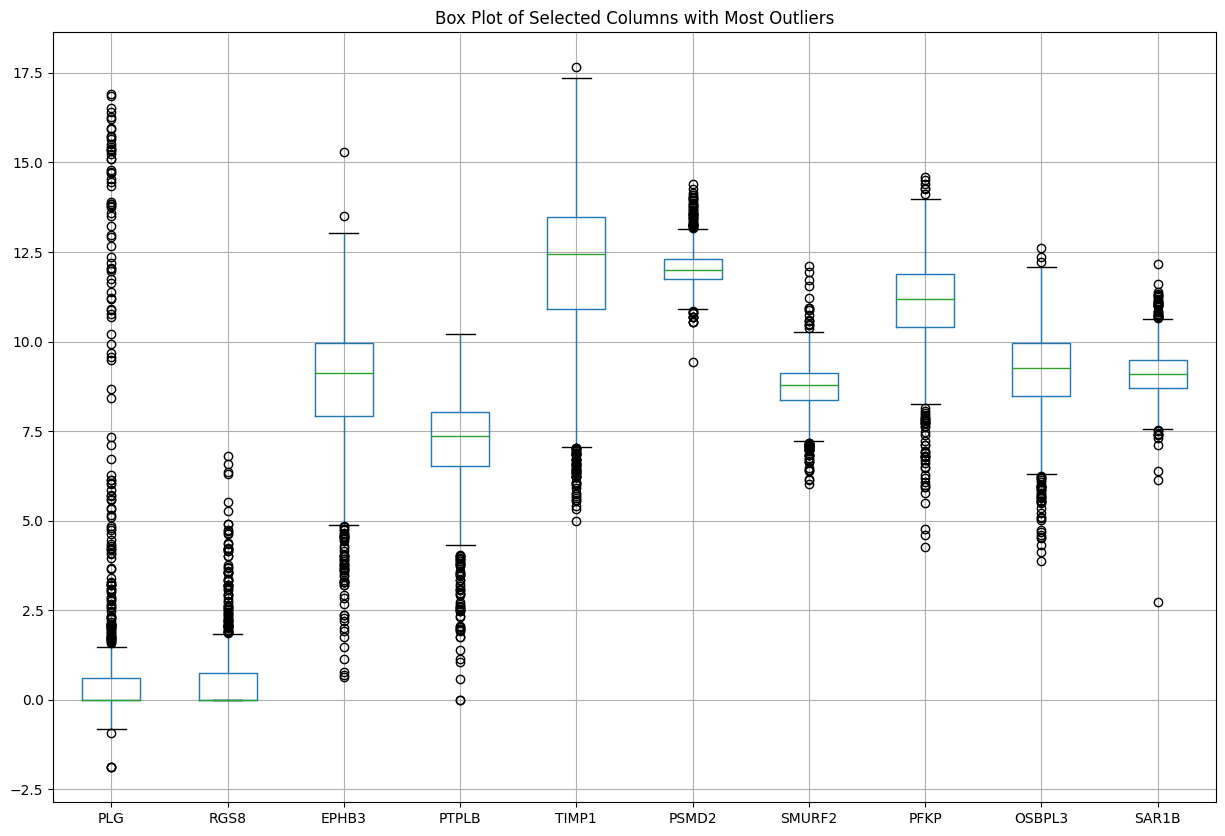

In [16]:
#lets look closer at a sample of outliers
#below I will look at 10 features with the most outliers, in a box plot
#Calculate IQR for each column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
#Determine outliers using the 1.5*IQR criteria
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
#Count the number of outliers in each column
outlier_counts = outliers.sum()
#Get columns with the highest number of outliers
#We'll select 5 columns for clearer visualization
selected_columns = outlier_counts.nlargest(10).index
#Create box plots for the selected columns
plt.figure(figsize=(15, 10))
df_numeric[selected_columns].boxplot()
plt.title('Box Plot of Selected Columns with Most Outliers')
plt.xticks(rotation=0)
plt.show()

In this subset of features with outliers. We can see that the outliers on the feature with the most outliers are very obvious, which means that these outliers will have some effect, but in total, he only accounts for 1.4%, so I don't think it will be deleted. I will discuss it in improve the accuracy of the model.

### Feature Scaling/Normalization

Normalisation ensures that all features in a dataset have the same scale. This is important for machine learning algorithms that rely on distance metrics such as k-nearest neighbours or support vector machines. Features with different scales may dominate the learning process and lead to biased results. It also helps in the comparison and interpretation of the importance of coefficients or features in the model. Normalisation also prevents numerical instability when performing calculations and makes the training process more stable.

#### Robust Scaling

Robust Scaling is a Feature Scaling method, especially suitable for processing datasets containing outliers.This method preserves the shape of the data distribution, but is more reliable with smaller data sets.

In [14]:
# Assuming your data is stored in a DataFrame 'df'
# 'subgroup' is the column representing the subgroup

# Extract features (excluding the subgroup column)
features = dataset[dataset.columns[0:-1]]

# Extract subgroups
subgroups = dataset['Subgroup']

# Initialize RobustScaler
scaler = RobustScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns,
                         index=features.index)

# Concatenate the scaled features and subgroups
df_scaled['Subgroup'] = subgroups

# Now df_scaled contains the scaled features with the subgroup information

In [18]:
#check the dataset
#df_scaled

visualize the dataset after robut scaling for observation 

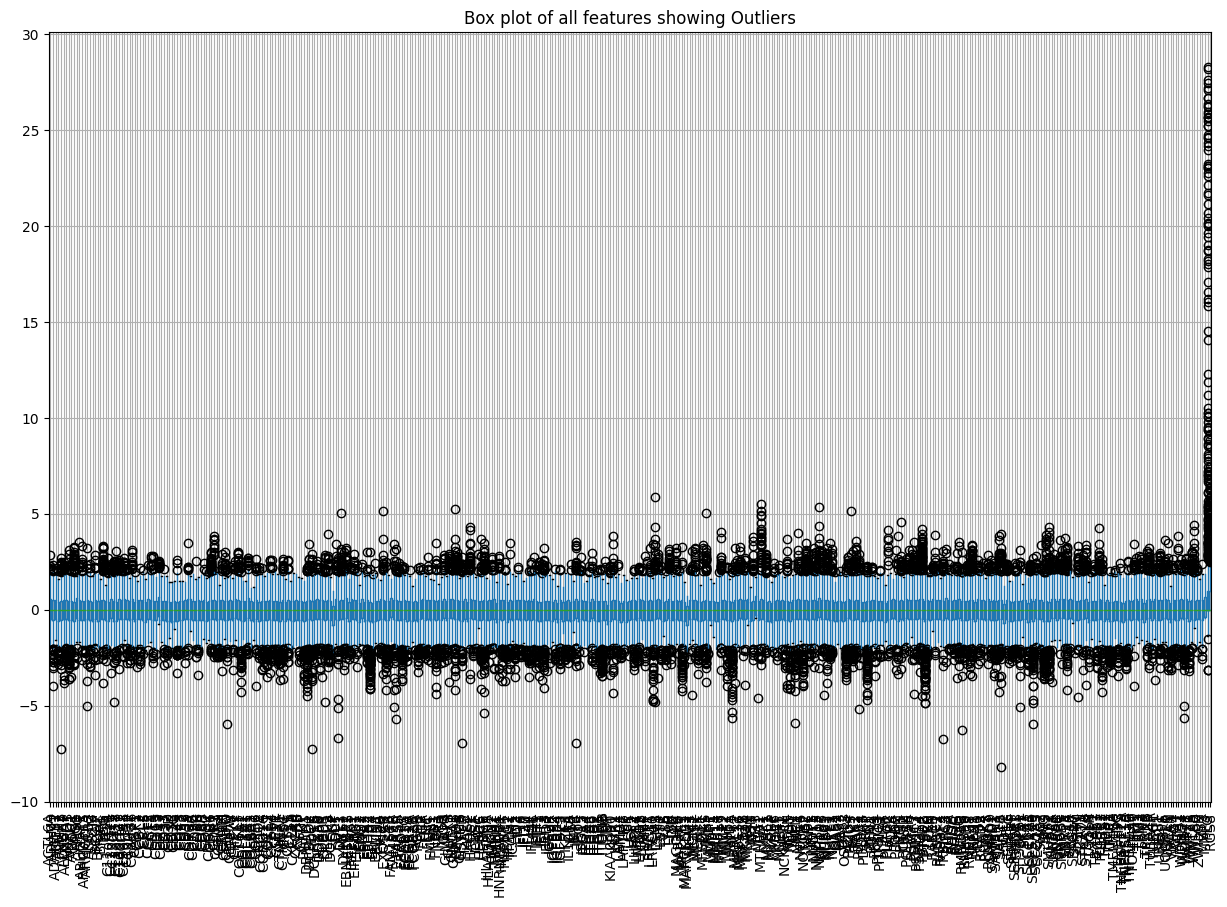

In [19]:
df_scaled_numeric = df_scaled.select_dtypes(include = [np.number])
#show the each numerical column by box plot
plt.figure(figsize=(15,10)) #set the plot size
df_scaled_numeric.boxplot()
plt.title('Box plot of all features showing Outliers') #title of the plot
plt.xticks(rotation=90) #display x-axis labels rotated by 90 degrees
plt.show()

It can be seen that the overall distribution of the data has remained more or less unchanged, but the overall distribution has stabilised in a fixed range.

#### Standard Scaling

It scales the data to a standard normal distribution with mean 0 and standard deviation 1. Some machine learning algorithms, especially those that rely on distance metrics (e.g. K Nearest Neighbours, Support Vector Machines, etc.), are more sensitive to the normalisation of the input data.Standard Scaling ensures that the range of values is relatively consistent across features, which contributes to the performance of such algorithms. It is worth noting that Standard Scaling is sensitive to outliers, but its impact is relatively small compared to some other scaling methods.

In [20]:
scaler = StandardScaler()
normalized_feature = scaler.fit_transform(dataset[dataset.columns[0:-1]])

df_normalized = pd.DataFrame(normalized_feature, columns=features.columns,
                         index=features.index)

# Concatenate the scaled features and subgroups
df_normalized['Subgroup'] = subgroups

In [102]:
#check the dataset
#df_normalized

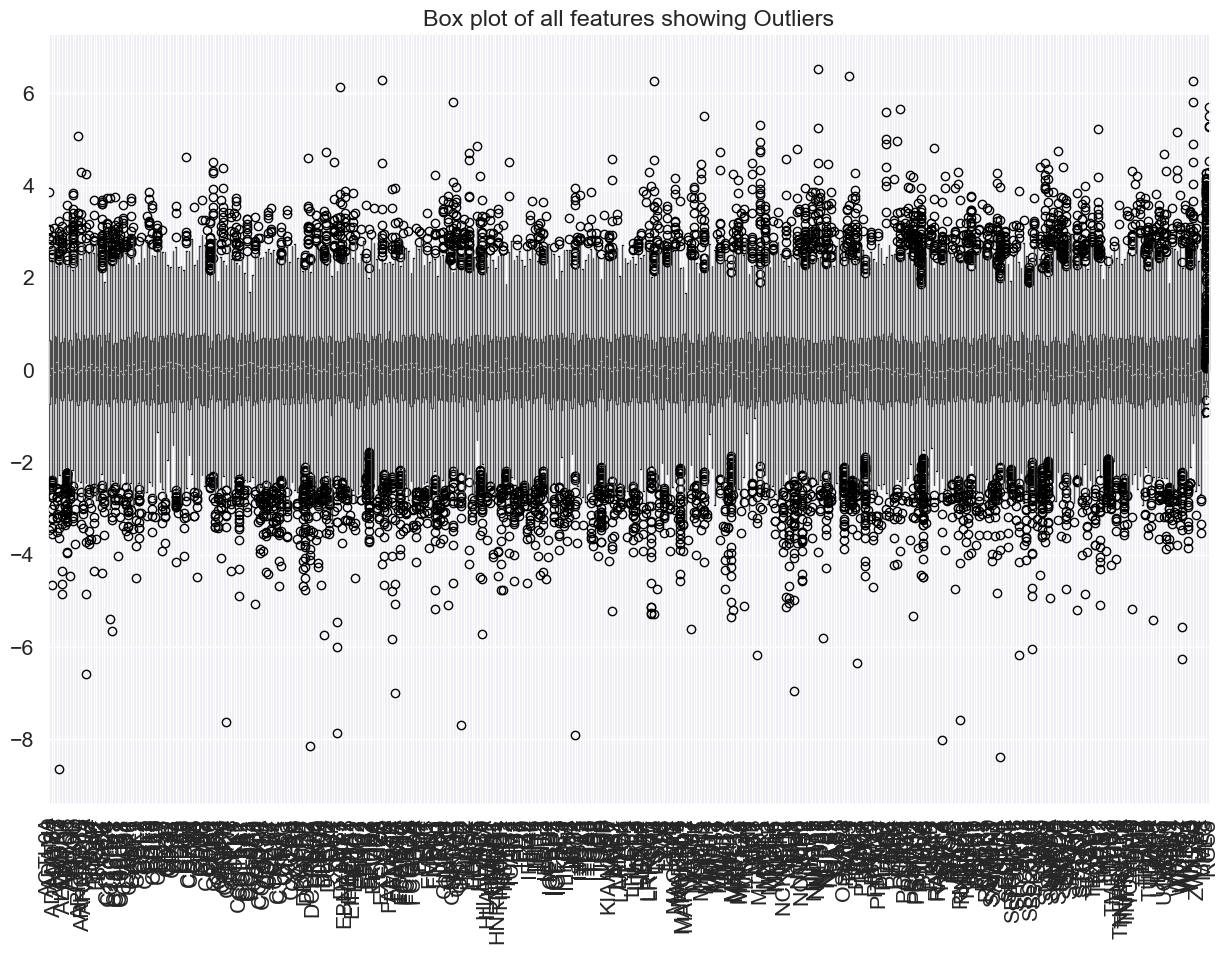

In [104]:
df_normalized_numeric = df_normalized.select_dtypes(include = [np.number])
#show the each numerical column by box plot
plt.figure(figsize=(15,10)) #set the plot size
df_normalized_numeric.boxplot()
plt.title('Box plot of all features showing Outliers') #title of the plot
plt.xticks(rotation=90) #display x-axis labels rotated by 90 degrees
plt.show()

The result of Standard Scaling is very neat and looks like it's better than Robust Scaling.

#### MinMax

MinMaxScaler scales the data to a specified range with a linear transformation, but does not change the shape of the data distribution. This helps preserve the relative relationships of the original data. Some machine learning algorithms, especially those that are sensitive to the range of input features, such as Support Vector Machines (SVMs) and Neural Networks, may benefit from Min-Max scaling. This helps to avoid certain features dominating model training. MinMaxScaler has relatively little impact on outliers compared to some other scaling methods. Since it is implemented through a linear transformation, the effect of outliers is diluted to some extent.

In [18]:
scaler = MinMaxScaler()
minmax_feature = scaler.fit_transform(dataset[dataset.columns[0:-1]])

df_minmax = pd.DataFrame(minmax_feature, columns=features.columns,
                         index=features.index)

# Concatenate the scaled features and subgroups
df_minmax['Subgroup'] = subgroups

In [24]:
#df_minmax

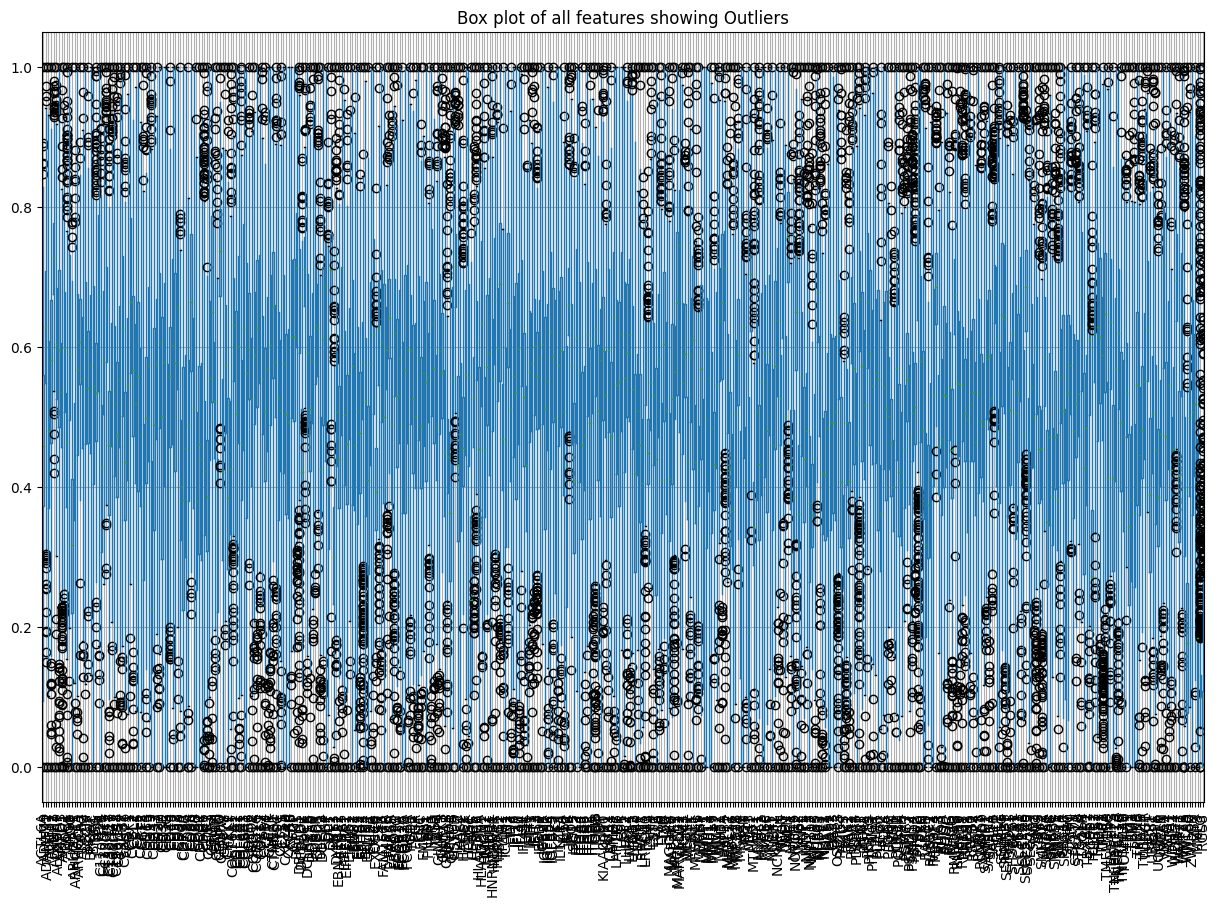

In [16]:
df_minmax_numeric = df_minmax.select_dtypes(include = [np.number])
#show the each numerical column by box plot
plt.figure(figsize=(15,10)) #set the plot size
df_minmax_numeric.boxplot()
plt.title('Box plot of all features showing Outliers') #title of the plot
plt.xticks(rotation=90) #display x-axis labels rotated by 90 degrees
plt.show()

The data after MinMaxScaler is bound between 0 and 1.

#### Choose normalisation in model by accuracy

It can be seen that each of these normalisation approaches is good in its own way, with different directions of bias, so it is important to consider which normalisation performs better on the model. Since this is a high dimensional array with multiple classes, classification models like SVM, Random Forest and Gradient Boosting are more suitable.Normalisation mainly affects SVM because Random Forest and Gradient Boosting are insensitive to this.

I will use a combination of pipeline and cross-validation to verify the accuracy of the results of these models after different normalization for understanding to choose.

In [26]:
#Divide the original data into test set and training set.
y = dataset["Subgroup"].values
X = dataset.drop(["Subgroup"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#pipeline  the normalization and classification method:
normalization_methods = [('StandardScaler', StandardScaler()),
                          ('RobustScaler', RobustScaler()),
                          ('MinMaxScaler', MinMaxScaler())]
classifiers = [('SVM', SVC()), 
               ('Random Forest', RandomForestClassifier()), 
               ('Gradient Boosting', GradientBoostingClassifier())]

# Iterate over normalization methods and classifiers
for norm_name, norm_method in normalization_methods:
    print(f"\nNormalization Method: {norm_name}: ")
    
    # Apply normalization to the training set
    X_train_normalized = norm_method.fit_transform(X_train)
    
    # Apply normalization to the test set
    X_test_normalized = norm_method.transform(X_test)
    
    # Iterate over classifiers
    for clf_name, clf in classifiers:
        print(f"\nClassifier: {clf_name}")
        
        # Train and evaluate using cross-validation
        scores = cross_val_score(clf, X_train_normalized, y_train, cv=5)
        print(f"Cross-Validated Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")
        
        # Train the classifier on the entire training set and evaluate on the test set
        clf.fit(X_train_normalized, y_train)
        test_accuracy = clf.score(X_test_normalized, y_test)
        print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print('------------------------------------------------------------')

#print the result without the normalization:
print("without Normalization(original dataset):")
for clf_name,clf in classifiers:
    print(f"\nClassifier: {clf_name}")
    # Train and evaluate using cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Cross-Validated Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")
        
    # Train the classifier on the entire training set and evaluate on the test set
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")


Normalization Method: StandardScaler: 

Classifier: SVM
Cross-Validated Accuracy: 0.8095 (±0.0374)
Test Accuracy: 0.8065
------------------------------------------------------------

Classifier: Random Forest
Cross-Validated Accuracy: 0.8224 (±0.0465)
Test Accuracy: 0.8194
------------------------------------------------------------

Classifier: Gradient Boosting
Cross-Validated Accuracy: 0.7820 (±0.0332)
Test Accuracy: 0.8000
------------------------------------------------------------

Normalization Method: RobustScaler: 

Classifier: SVM
Cross-Validated Accuracy: 0.7917 (±0.0511)
Test Accuracy: 0.8000
------------------------------------------------------------

Classifier: Random Forest
Cross-Validated Accuracy: 0.8062 (±0.0454)
Test Accuracy: 0.8258
------------------------------------------------------------

Classifier: Gradient Boosting
Cross-Validated Accuracy: 0.7836 (±0.0387)
Test Accuracy: 0.7935
------------------------------------------------------------

Normalization M

1. It can be seen that the accuracy of the data after StandardScaler is improved in all three models.
2. Effect of RobustScaler on the precision rate on the model: no significant change on SVM, opposite effect on Random Forest, 2% change on Gradient Boost.
3. Effect of MinMaxScaler over data on the precision rate on the model: 2% on SVM, 1% on Random Forest, no significant change on gradient.

MinMaxScaler performs best on both SVM and random forests.  
RobustScaler is the best performer in terms of gradient enhancement.  
MinMaxScaler's overall deviation of accuracy is smaller than that of the other two methods.

From the results, it can be concluded that the accuracy of the model training obtained from MinMaxScaler is generally higher, so the MinMaxScaler is chosen to train the data. But only SVM which is very sensitive to the scale of features, improves the accuracy by 2% after normalization, while Random Forest and Gradient Boosting, which are not sensitive to the scale of the features, do not change much or even have an inverse effect after normalization. Random forests will be trained with the raw data when comparing the models later.

Preparing Data for Normalisation and split to train set and test set

In [19]:
#using MinMax normalisation:
y_minmax = df_minmax["Subgroup"].values
X_minmax = df_minmax.drop(["Subgroup"],axis=1)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(minmax_feature, y_minmax, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((619, 440), (155, 440))

In [30]:
X_train_normalized.shape, X_test_normalized.shape

((619, 440), (155, 440))

In [31]:
X_train_minmax.shape,X_test_minmax.shape

((619, 440), (155, 440))

## Classification Model Development and Evaluation

### SVM model:

In [32]:
#build model
svm=SVC(kernel='rbf')
# fit to training set
svm.fit(X_train_minmax, y_train_minmax)
# predictions on test set
y_pred_svm=svm.predict(X_test_minmax)
#prefiction on train set
y_pred_svm_train = svm.predict(X_train_minmax)
# compute and print accuracy score
accuracy = accuracy_score(y_test_minmax, y_pred_svm)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.58%


accuracy_score() yields the accuracy rate on a single model

Due to kernel function determines the type of decision boundary the algorithm will create and this is a high dimensional array and contains 6 categories. The RBF kernel is effective in capturing non-linear relationships in the data. When the data is not linearly separable in the input space, allows SVM to model complex decision boundaries, implicitly maps the input features to a high-dimensional space, allowing SVM to model non-linear relationships without explicitly computing the transformed feature space. Chooseing kernel ='rbf' can be computationally efficient, especially when dealing with high-dimensional data.

After train the model by normalised train set, the accuracy of the SVM model's prediction can achieve 82% on given test set.

#### Evaluation of the model

##### bootstrap 

Unlike svm.score(), bootstrap is a performance metric for the entire integration model.

Statistical resampling, which trains the model by sampling multiple subsets of samples from the original data with playback.

Assess the variability and uncertainty of model parameters or performance
This can give me insights into the stability and reliability of your models

In [33]:
accuracy = svm.score(X_test_minmax, y_test_minmax)
print(f"Accuracy without bootstrapping: {accuracy:.4f}")

Accuracy without bootstrapping: 0.8258


In [34]:
# Define the number of bootstrap iterations
num_iterations = 100
accuracies = []
for _ in range(num_iterations):
    # Generate a bootstrap sample
    indices = np.random.choice(len(X_train_minmax), size=len(X_train_minmax), replace=True)
    X_bootstrap = X_train_minmax[indices]
    y_bootstrap = y_train_minmax[indices]
    
    # Fit the SVM classifier on the bootstrap sample
    svm.fit(X_bootstrap, y_bootstrap)
    
    # Evaluate the classifier on the test set
    accuracy = svm.score(X_test_minmax, y_test_minmax)
    accuracies.append(accuracy)

# Calculate the mean accuracy and its standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Standard deviation of accuracy: {std_accuracy:.4f}")
print(f"{std_accuracy*100/mean_accuracy}%")

Mean accuracy: 0.8224
Standard deviation of accuracy: 0.0146


After multiple sampling in Bootstrap: the estimate of the average performance on different subsets of samples is 0.8224 and the standard deviation of the accuracy between these models is 0.0146.

It can be concluded that the estimated accuracy of the model on the overall sample falls roughly within the range of 0.8224 ± 0.0146. The uncertainty of the model is relatively low and relatively stable.

##### cross-validation

Cross-validation helps to reduce the impact of the division between training and validation sets on performance evaluation

Assess the generalization performance of the models.
Evaluate performance metrics (e.g., accuracy, precision, recall, F1-score) on each fold and compute the average performance
This helps you understand how your models perform across different subsets of your data

In [35]:
print('Normalize after train test split')
num_folds = 10
# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and obtain accuracy scores
cross_val_scores = cross_val_score(svm, minmax_feature, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cross_val_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"\nMean Accuracy across all folds: {mean_accuracy:.4f}")

Normalize after train test split
Fold 1: Accuracy = 0.8205
Fold 2: Accuracy = 0.8333
Fold 3: Accuracy = 0.8590
Fold 4: Accuracy = 0.7308
Fold 5: Accuracy = 0.9221
Fold 6: Accuracy = 0.7273
Fold 7: Accuracy = 0.8701
Fold 8: Accuracy = 0.7922
Fold 9: Accuracy = 0.8961
Fold 10: Accuracy = 0.8442

Mean Accuracy across all folds: 0.8296


Average performance over 10 model training and validation sessions is 0.8296

In [36]:
# Perform cross-validation and obtain predicted labels for each fold
predicted = cross_val_predict(svm, minmax_feature, y, cv=kf)
# Calculate the confusion matrix for each fold
for fold, (train_index, test_index) in enumerate(kf.split(minmax_feature), 1):
    y_test = y[test_index]
    y_pred = predicted[test_index]
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {fold}:\n{confusion}")

# Note: If you also want to compute the mean confusion matrix across all folds,
# you can aggregate the individual confusion matrices and calculate the mean.

# Calculate the overall confusion matrix across all folds
overall_confusion = confusion_matrix(y, predicted)
print(f"\nOverall Confusion Matrix:\n{overall_confusion}")

Confusion Matrix for Fold 1:
[[11  2  0  0  0  1]
 [ 0 10  0  0  0  0]
 [ 0  0 12  0  0  4]
 [ 1  0  1  9  2  1]
 [ 0  0  0  1 10  0]
 [ 0  0  0  1  0 12]]
Confusion Matrix for Fold 2:
[[11  1  0  1  0  1]
 [ 0 13  0  0  0  1]
 [ 0  0 10  0  0  1]
 [ 3  0  1  7  1  0]
 [ 0  0  1  0 11  0]
 [ 1  0  1  0  0 13]]
Confusion Matrix for Fold 3:
[[10  3  0  0  0  1]
 [ 1 13  0  0  0  0]
 [ 1  0 13  1  0  1]
 [ 0  0  1  9  0  2]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  6]]
Confusion Matrix for Fold 4:
[[12  1  0  0  0  1]
 [ 0 10  0  0  0  3]
 [ 0  0 10  1  0  1]
 [ 1  3  3  8  1  2]
 [ 0  0  0  1 10  0]
 [ 0  0  3  0  0  7]]
Confusion Matrix for Fold 5:
[[12  1  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 13  1  0  2]
 [ 1  0  0  8  0  1]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 11]]
Confusion Matrix for Fold 6:
[[ 9  1  0  1  0  1]
 [ 1 11  0  1  0  1]
 [ 3  0  8  4  0  0]
 [ 0  1  0  6  2  1]
 [ 0  0  0  1 12  0]
 [ 1  1  1  0  0 10]]
Confusion Matrix for Fold 7:
[[13  0  0  0  0  1]
 [ 3  8  0  0 

Recall is the ability of a model to successfully predict positive category samples, also known as Sensitivity or True Positive Rate. Precision is the proportion of samples in which the model predicts a positive category that are actually positive, also known as Positive Predictive Value. Precision measures the proportion of all samples in which the model predicts positive examples that are actually positive examples

Row 1 (C1):  
  
True Positives (TP): 106 instances correctly classified as C1.  
False Positives (FP):  
11 instances were misclassified as C2.  
2 instances were misclassified as C3.  
2 instances were misclassified as C4.  
8 instances were misclassified as C6.  
Row 2 (C2):  
  
True Positives (TP): 110 instances correctly classified as C2.  
False Positives (FP):  
7 instances were misclassified as C1.  
1 instance was misclassified as C3.  
2 instances were misclassified as C4.  
9 instances were misclassified as C6.  
Row 3 (C3):  
  
True Positives (TP): 101 instances correctly classified as C3.  
False Positives (FP):  
5 instances were misclassified as C1.  
10 instances were misclassified as C4.  
13 instances were misclassified as C6.  
Row 4 (C4):  
  
True Positives (TP): 86 instances correctly classified as C4.  
False Positives (FP):  
10 instances were misclassified as C1.  
5 instances were misclassified as C2.  
11 instances were misclassified as C3.  
9 instances were misclassified as C5.  
8 instances were misclassified as C6.  
Row 5 (C5):  

True Positives (TP): 124 instances correctly classified as C5.  
False Positives (FP):  
2 instances were misclassified as C1.  
3 instances were misclassified as C4.  
Row 6 (C6):  
  
True Positives (TP): 115 instances correctly classified as C6.  
False Positives (FP):  
4 instances were misclassified as C1.  
3 instances were misclassified as C2.  
6 instances were misclassified as C3.  
1 instance was misclassified as C4.  

It can be concluded that this model has high accuracy and stability.

##### Quantitative Performance evaluation of the model

Training and Test Accuracies

In [37]:
print('in Testing set')
print( classification_report(y_test_minmax, y_pred_svm))
print("-------------------------------------------------")
print('in Training set')
print( classification_report(y_train_minmax, y_pred_svm_train))

in Testing set
              precision    recall  f1-score   support

          C1       0.81      0.79      0.80        28
          C2       0.85      0.96      0.90        23
          C3       0.81      0.81      0.81        27
          C4       0.89      0.62      0.73        26
          C5       0.88      0.91      0.89        23
          C6       0.76      0.89      0.82        28

    accuracy                           0.83       155
   macro avg       0.83      0.83      0.83       155
weighted avg       0.83      0.83      0.82       155

-------------------------------------------------
in Training set
              precision    recall  f1-score   support

          C1       0.96      0.93      0.94       101
          C2       0.93      0.93      0.93       106
          C3       0.89      0.91      0.90       102
          C4       0.93      0.83      0.88       103
          C5       0.97      0.97      0.97       106
          C6       0.84      0.94      0.89       1

The results of the model on the test set and the training set are shown here. :  
In Test set the model shows: 
1. The model has good precision, recall, and F1-score across different classes.
2. The overall accuracy on the testing set is 83%.
3. The macro and weighted averages of precision, recall, and F1-score are consistent and indicate balanced performance.   
In Train set the model shows:
1. The overall accuracy on the training set is 92%.
2. The macro and weighted averages of precision, recall, and F1-score are consistent and indicate good generalization on the training set.   

In summary, the model appears to generalize well from the training set to the testing set, as indicated by consistent performance metrics across both sets. Accuracy varies up to 10% between the training and test sets. Indicates that the model may not generalise well to new, unseen data. It may capture noise or idiosyncrasies in the training set that are not applicable to other datasets.

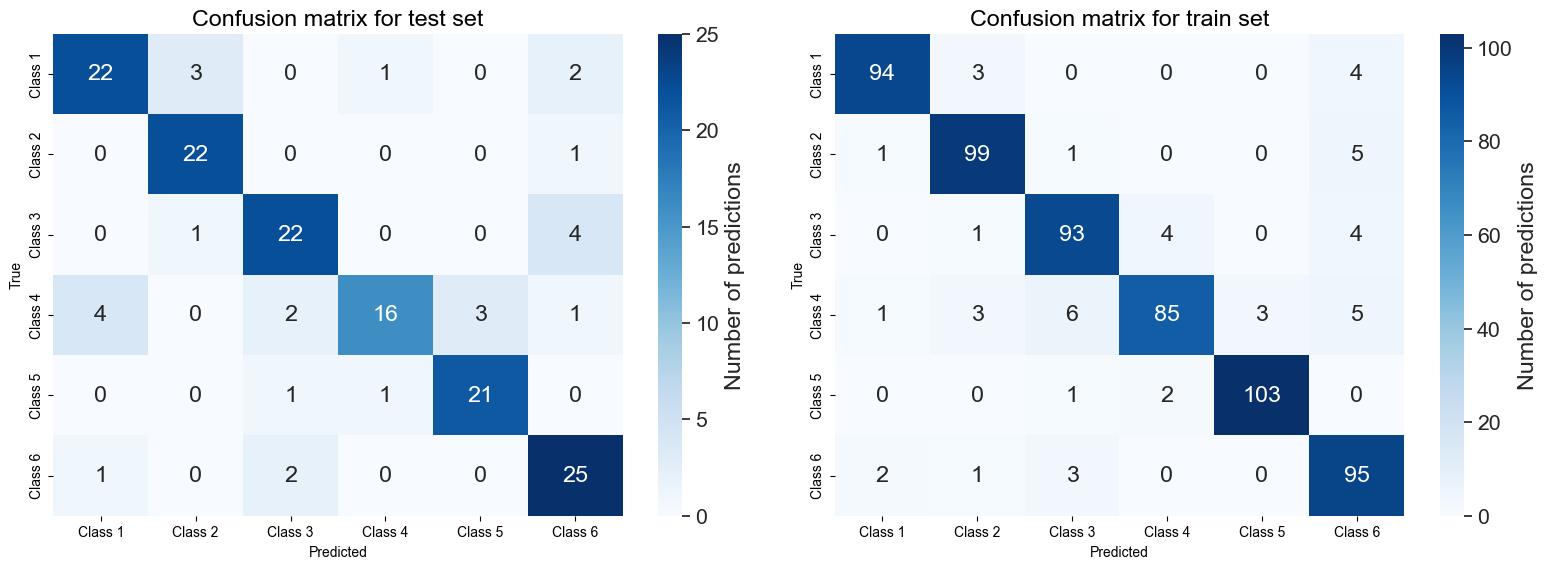

In [38]:
# Your confusion matrices
cm = confusion_matrix(y_test_minmax, y_pred_svm)
cm2 = confusion_matrix(y_train_minmax, y_pred_svm_train)

# Class labels
class_labels = [f'Class {i}' for i in range(1, 7)]

# Set up the figure size and font scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(font_scale=1.4)

# Plot the confusion matrix using a heatmap
for ax, cm_data, title in zip(axes, [cm, cm2], ['Confusion matrix for test set', 'Confusion matrix for train set']):
    sns.heatmap(cm_data, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels,
                cbar_kws={'label': 'Number of predictions'},
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

This is the current confusion matrix for a single model.  
In Test set:
It can see that three of the class1s are misclassified as class2 and two are misclassified as class6.There are only two misclassifications for class2, four misclassifications for class3 as class6, four misclassifications for class4 as class1, one misclassification for class5 as class3 and one misclassification for class4. There are two misclassifications for class6 as class3.

Overall, similar trends are shown in the two confusion matrices: e.g., class3 has the highest error rate on both sides, and the predicted class6 is incorrectly presented in class 1234.

#### Improving the Model

##### gridsearch

The performance of the model is improved by selecting the best combination of hyperparameters. This is important to ensure the model's ability to generalise across different datasets. Furthermore, by employing cross-validation to evaluate model performance, it mitigates the risk of overfitting to a specific dataset

In [39]:
parameters = [{'C': [0.1,1,10,100,1000], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}]
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=10) # 
grid_search = grid_search.fit(X_train_minmax, y_train_minmax)
# best params after tuning; 
print(grid_search.best_params_)
# best params after hyper-parameter tuning
print(grid_search.best_estimator_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our dataset with tuning is : {:.2f}%" .format(accuracy))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
Accuracy for our dataset with tuning is : 82.23%


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} This combination improves the performance of the model and does not overfitting.

In [40]:
# instantiate classifier with optimal hyperparameters
svm2=SVC(C=10, gamma=0.1, kernel='rbf')
# fit classifier to training set
clf=svm2.fit(X_train_minmax, y_train_minmax)
# make predictions on test set
y_pred_svm2 = svm2.predict(X_test_minmax)
y_pred_svm2_train = svm2.predict(X_train_minmax)
# compute and print accuracy score
acc = accuracy_score(y_test_minmax, y_pred_svm2) *100
# print accuracy %
print("Accuracy for our dataset in predicting test data (when using the best parameteres) is : {:.2f}%" .format(acc))

Accuracy for our dataset in predicting test data (when using the best parameteres) is : 86.45%


It can be seen that the accuracy can reach 86.45% after the parameter change.

In [41]:
accuracy = svm2.score(X_test_minmax, y_test_minmax)
print(f"Accuracy without bootstrapping: {accuracy:.4f}")

Accuracy without bootstrapping: 0.8645


In [42]:
# Define the number of bootstrap iterations
num_iterations = 100

# Perform bootstrapping
accuracies = []
for _ in range(num_iterations):
    # Generate a bootstrap sample
    indices = np.random.choice(len(X_train_minmax), size=len(X_train_minmax), replace=True)
    X_bootstrap = X_train_minmax[indices]
    y_bootstrap = y_train_minmax[indices]
    
    # Fit the SVM classifier on the bootstrap sample
    svm.fit(X_bootstrap, y_bootstrap)
    
    # Evaluate the classifier on the test set
    accuracy = svm2.score(X_test_minmax, y_test_minmax)
    accuracies.append(accuracy)

# Calculate the mean accuracy and its standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Standard deviation of accuracy: {std_accuracy:.4f}")

Mean accuracy: 0.8645
Standard deviation of accuracy: 0.0000


The mean of the accuracy values is 0.8645. When the standard deviation is 0, it means that all Bootstrap sampling values are the same and there is no variability. This may indicate that there is very little uncertainty in this model. Of course, it could also be that the data samples themselves are very similar, resulting in a very stable model across different subsamples. Overall, the model is very stable.

In [43]:
num_folds = 10
# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and obtain accuracy scores
cross_val_scores = cross_val_score(svm2, minmax_feature, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cross_val_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"\nMean Accuracy across all folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.8462
Fold 2: Accuracy = 0.8846
Fold 3: Accuracy = 0.8462
Fold 4: Accuracy = 0.7308
Fold 5: Accuracy = 0.9091
Fold 6: Accuracy = 0.7143
Fold 7: Accuracy = 0.8442
Fold 8: Accuracy = 0.8571
Fold 9: Accuracy = 0.8701
Fold 10: Accuracy = 0.8571

Mean Accuracy across all folds: 0.8360


The average accuracy of the model increased by 1% when training and evaluating different subsets of the dataset in a cross-validation setup is not very significant

The mean bootstrap accuracy is higher than the mean accuracy across all folds, it suggests that the model's performance is, on average, better when assessed using bootstrap resampling. Maybe it's because the model is more sensitive to some feature data.

In [44]:
# Perform cross-validation and obtain predicted labels for each fold
predicted = cross_val_predict(svm2, minmax_feature, y, cv=kf)
# Calculate the confusion matrix for each fold
for fold, (train_index, test_index) in enumerate(kf.split(minmax_feature), 1):
    y_test = y[test_index]
    y_pred = predicted[test_index]
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {fold}:\n{confusion}")

# Note: If you also want to compute the mean confusion matrix across all folds,
# you can aggregate the individual confusion matrices and calculate the mean.

# Calculate the overall confusion matrix across all folds
overall_confusion = confusion_matrix(y, predicted)
print(f"\nOverall Confusion Matrix:\n{overall_confusion}")

Confusion Matrix for Fold 1:
[[12  2  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 13  0  0  2]
 [ 1  0  2 10  0  1]
 [ 0  0  0  2  9  0]
 [ 1  0  0  0  0 12]]
Confusion Matrix for Fold 2:
[[12  0  1  1  0  0]
 [ 1 13  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 2  0  1  9  0  0]
 [ 0  0  1  0 11  0]
 [ 1  0  1  0  0 13]]
Confusion Matrix for Fold 3:
[[11  2  0  0  0  1]
 [ 1 12  0  1  0  0]
 [ 1  0 14  1  0  0]
 [ 0  0  2  8  0  2]
 [ 0  0  0  0 16  0]
 [ 0  0  1  0  0  5]]
Confusion Matrix for Fold 4:
[[12  1  0  1  0  0]
 [ 0 10  0  0  0  3]
 [ 0  0  9  1  0  2]
 [ 1  3  3  9  0  2]
 [ 0  0  0  1 10  0]
 [ 0  0  2  1  0  7]]
Confusion Matrix for Fold 5:
[[12  1  0  0  0  0]
 [ 1 10  0  0  0  0]
 [ 0  1 12  1  0  2]
 [ 0  0  0  9  0  1]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 11]]
Confusion Matrix for Fold 6:
[[ 9  1  0  1  0  1]
 [ 3  9  1  1  0  0]
 [ 2  1  8  4  0  0]
 [ 0  0  0  7  2  1]
 [ 0  0  0  1 12  0]
 [ 1  1  1  0  0 10]]
Confusion Matrix for Fold 7:
[[13  0  0  1  0  0]
 [ 3  8  0  1 

Row 1 (C1): The model predicted 112 instances as C1, and the actual class was C1.  
Row 2 (C2): The model predicted 104 instances as C2, and the actual class was C2.  
Row 3 (C3): The model predicted 103 instances as C3, and the actual class was C3.  
Row 4 (C4): The model predicted 93 instances as C4, and the actual class was C4.  
Row 5 (C5): The model predicted 123 instances as C5, and the actual class was C5.  
Row 6 (C6): The model predicted 112 instances as C6, and the actual class was C6.  

1. Row 1 (C1):  
True Positives (TP): 112 instances correctly classified as C1.  
False Positives (FP):  
8 instances were misclassified as C2.  
3 instances were misclassified as C3.  
4 instances were misclassified as C4.  
2 instances were misclassified as C6.  
True Negatives (TN), False Negatives (FN): These values are not explicitly given in the confusion matrix, but you can calculate them based on the other counts.    
 
2. Row 2 (C2):  
True Positives (TP): 104 instances correctly classified as C2.  
False Positives (FP):  
12 instances were misclassified as C1.  
2 instances were misclassified as C3.  
5 instances were misclassified as C4.  
6 instances were misclassified as C6.  

3. Row 3 (C3):
True Positives (TP): 103 instances correctly classified as C3.  
False Positives (FP):  
4 instances were misclassified as C1.  
3 instances were misclassified as C2.  
12 instances were misclassified as C4.  
7 instances were misclassified as C6.    

4. Row 4 (C4):
True Positives (TP): 93 instances correctly classified as C4.   
False Positives (FP):   
6 instances were misclassified as C1.  
4 instances were misclassified as C2.    
14 instances were misclassified as C3.    
8 instances were misclassified as C6.    
  
5. Row 5 (C5): 
True Positives (TP): 123 instances correctly classified as C5.  
False Positives (FP):  
2 instances were misclassified as C1.  
4 instances were misclassified as C4.    

6. Row 6 (C6):  
True Positives (TP): 112 instances correctly classified as C6.  
False Positives (FP):  
4 instances were misclassified as C1.  
5 instances were misclassified as C2.  
7 instances were misclassified as C3.  
1 instance was misclassified as C4.  

The results show an overall increase in accuracy.

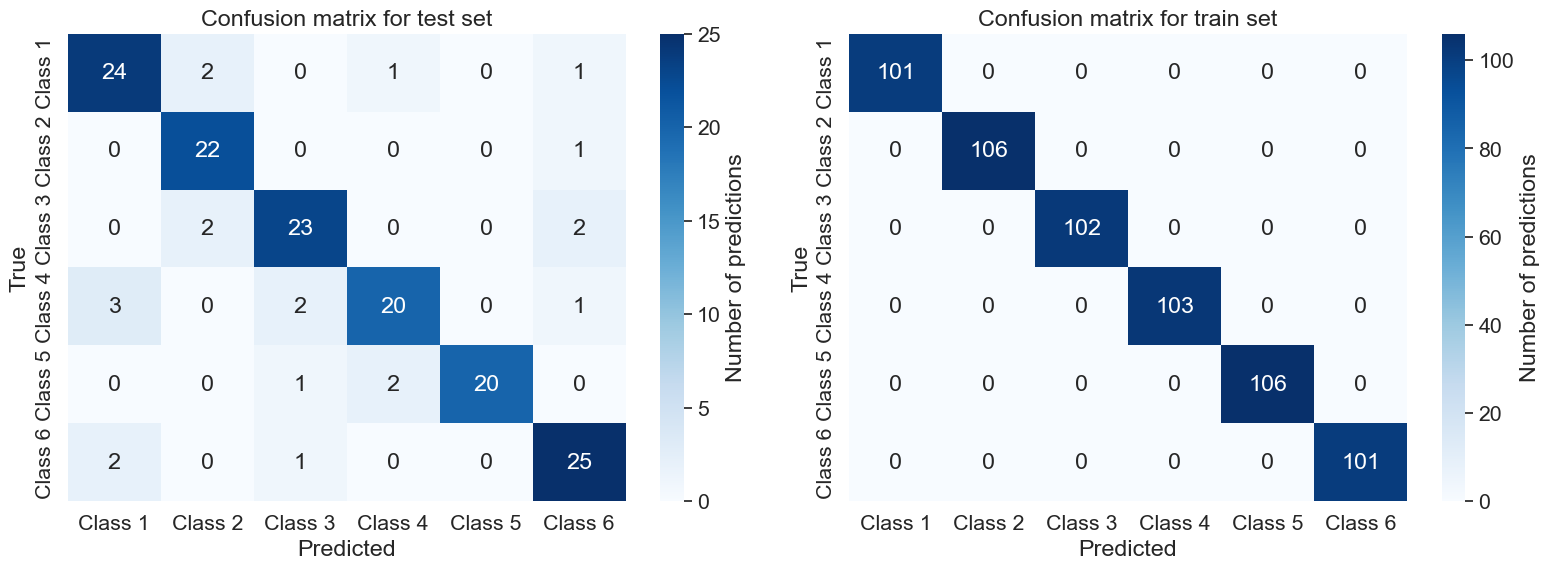

In [45]:
# Your confusion matrices
cm = confusion_matrix(y_test_minmax, y_pred_svm2)
cm2 = confusion_matrix(y_train_minmax, y_pred_svm2_train)

# Class labels
class_labels = [f'Class {i}' for i in range(1, 7)]

# Set up the figure size and font scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(font_scale=1.4)

# Plot the confusion matrix using a heatmap
for ax, cm_data, title in zip(axes, [cm, cm2], ['Confusion matrix for test set', 'Confusion matrix for train set']):
    sns.heatmap(cm_data, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels,
                cbar_kws={'label': 'Number of predictions'},
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

From the results, it seems that the accuracy of the test set has increased, but this is already the limit, and any further fitting is at risk of overfitting.The increase in accuracy over the previous model, and the increase in accuracy in cross-checking, suggests that it is not over-simulation that is responsible for the results.

In [46]:
# printing classification report for test set
print("In Test set:")
print(classification_report(y_test_minmax, y_pred_svm2))
print("--------------------------------------------------")
print("In Train set:")
print(classification_report(y_train_minmax, y_pred_svm2_train))

In Test set:
              precision    recall  f1-score   support

          C1       0.83      0.86      0.84        28
          C2       0.85      0.96      0.90        23
          C3       0.85      0.85      0.85        27
          C4       0.87      0.77      0.82        26
          C5       1.00      0.87      0.93        23
          C6       0.83      0.89      0.86        28

    accuracy                           0.86       155
   macro avg       0.87      0.87      0.87       155
weighted avg       0.87      0.86      0.86       155

--------------------------------------------------
In Train set:
              precision    recall  f1-score   support

          C1       1.00      1.00      1.00       101
          C2       1.00      1.00      1.00       106
          C3       1.00      1.00      1.00       102
          C4       1.00      1.00      1.00       103
          C5       1.00      1.00      1.00       106
          C6       1.00      1.00      1.00       101


The results of the model on the test set and the training set are shown here. :  
In Test set:
1. The results of the model on the test set and the training set are shown here.
2. t shows good performance for certain classes (e.g., C1, C5) but less for others (e.g., C3, C4).
3. The macro average F1-score is 84%, suggesting a balanced performance across classes.  
In Train set:
1. The model performs exceptionally well on the training set, achieving 100% accuracy.
2. Risk of overfitting

#### Summary

The model seems to be performing consistently well across different folds in cross-validation and bootstrap samples, with minimal variability in accuracy. The absence of standard deviation (or a very low value) in the bootstrap accuracy suggests that the model's performance is robust across the resampled datasets. Regardless of how it's adjusted, class 4's accuracy is the lowest it's ever been.

### Random Forest

In [47]:
# Creating a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train model
rf_model.fit(X_train_minmax, y_train_minmax)

# test for prediction
y_pred_rf = rf_model.predict(X_test_minmax)
y_pred_rf_train = rf_model.predict(X_train_minmax)

# accuracy:
accuracy = accuracy_score(y_test_minmax, y_pred_rf)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.23%


It can be seen that the accuracy of the model can reach 83.23%.

#### bootstrap 

In [48]:
accuracy = rf_model.score(X_test_minmax, y_test_minmax)
print(f"Accuracy without bootstrapping: {accuracy:.4f}")

Accuracy without bootstrapping: 0.8323


In [49]:
# Define the number of bootstrap iterations
num_iterations = 100
accuracies = []
for _ in range(num_iterations):
    # Generate a bootstrap sample
    indices = np.random.choice(len(X_train_minmax), size=len(X_train_minmax), replace=True)
    X_bootstrap = X_train_minmax[indices]
    y_bootstrap = y_train_minmax[indices]
    
    # Fit the SVM classifier on the bootstrap sample
    rf_model.fit(X_bootstrap, y_bootstrap)
    
    # Evaluate the classifier on the test set
    accuracy = rf_model.score(X_test_minmax, y_test_minmax)
    accuracies.append(accuracy)

# Calculate the mean accuracy and its standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Standard deviation of accuracy: {std_accuracy:.4f}")

Mean accuracy: 0.8052
Standard deviation of accuracy: 0.0177


The average accuracy has dropped by 2%, but the standard deviation is not that large, and the model is still relatively stable.

##### cross-validation

In [50]:
num_folds = 10
# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and obtain accuracy scores
cross_val_scores = cross_val_score(rf_model, minmax_feature, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cross_val_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"\nMean Accuracy across all folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.8462
Fold 2: Accuracy = 0.8333
Fold 3: Accuracy = 0.8333
Fold 4: Accuracy = 0.7436
Fold 5: Accuracy = 0.9091
Fold 6: Accuracy = 0.7532
Fold 7: Accuracy = 0.7792
Fold 8: Accuracy = 0.7922
Fold 9: Accuracy = 0.8701
Fold 10: Accuracy = 0.8442

Mean Accuracy across all folds: 0.8204


Explain that how the data is partitioned has very little effect on the model, less than SVM. Random forests are less sensitive to this than SVM.

In [51]:
# Perform cross-validation and obtain predicted labels for each fold
predicted = cross_val_predict(rf_model, minmax_feature, y, cv=kf)
# Calculate the confusion matrix for each fold
for fold, (train_index, test_index) in enumerate(kf.split(minmax_feature), 1):
    y_test = y[test_index]
    y_pred = predicted[test_index]
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {fold}:\n{confusion}")

# Note: If you also want to compute the mean confusion matrix across all folds,
# you can aggregate the individual confusion matrices and calculate the mean.

# Calculate the overall confusion matrix across all folds
overall_confusion = confusion_matrix(y, predicted)
print(f"\nOverall Confusion Matrix:\n{overall_confusion}")

Confusion Matrix for Fold 1:
[[10  3  0  0  0  1]
 [ 0 10  0  0  0  0]
 [ 0  0 12  0  0  4]
 [ 0  1  1 11  0  1]
 [ 0  0  0  1 10  0]
 [ 0  0  0  0  0 13]]
Confusion Matrix for Fold 2:
[[10  1  0  1  0  2]
 [ 1 12  0  0  0  1]
 [ 0  0 11  0  0  0]
 [ 1  1  2  8  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  3  0  0 12]]
Confusion Matrix for Fold 3:
[[11  2  0  0  0  1]
 [ 1 13  0  0  0  0]
 [ 1  0 12  2  0  1]
 [ 0  0  2  8  0  2]
 [ 0  0  0  0 16  0]
 [ 0  1  0  0  0  5]]
Confusion Matrix for Fold 4:
[[13  0  0  0  0  1]
 [ 0 10  0  0  0  3]
 [ 0  0 10  1  0  1]
 [ 1  4  3  8  1  1]
 [ 0  0  0  1 10  0]
 [ 0  0  3  0  0  7]]
Confusion Matrix for Fold 5:
[[12  1  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 13  1  0  2]
 [ 0  0  1  9  0  0]
 [ 0  0  0  1 15  0]
 [ 1  0  0  0  0 10]]
Confusion Matrix for Fold 6:
[[ 9  0  0  1  0  2]
 [ 0 10  0  2  0  2]
 [ 1  0 11  3  0  0]
 [ 0  1  0  6  2  1]
 [ 0  0  0  1 12  0]
 [ 1  1  1  0  0 10]]
Confusion Matrix for Fold 7:
[[11  0  1  0  0  2]
 [ 4  7  0  0 

Row 1 (C1):  

True Positives (TP): 103 instances correctly classified as C1.  
False Positives (FP):  
10 instances were misclassified as C2.  
3 instances were misclassified as C3.  
2 instances were misclassified as C4.  
11 instances were misclassified as C6.  
Row 2 (C2):  

True Positives (TP): 108 instances correctly classified as C2.  
False Positives (FP):  
7 instances were misclassified as C1.  
1 instance was misclassified as C3.  
3 instances were misclassified as C4.  
10 instances were misclassified as C6.  
Row 3 (C3):   

True Positives (TP): 103 instances correctly classified as C3.  
False Positives (FP):  
4 instances were misclassified as C1.  
11 instances were misclassified as C4.  
11 instances were misclassified as C6.  
Row 4 (C4):  

True Positives (TP): 90 instances correctly classified as C4.  
False Positives (FP):  
6 instances were misclassified as C1.  
8 instances were misclassified as C2.  
15 instances were misclassified as C3.  
4 instances were misclassified as C5.  
6 instances were misclassified as C6.  
Row 5 (C5):  

True Positives (TP): 124 instances correctly classified as C5.  
False Positives (FP):  
1 instance was misclassified as C1.  
4 instances were misclassified as C4.  
Row 6 (C6):  

True Positives (TP): 107 instances correctly classified as C6.  
False Positives (FP):  
7 instances were misclassified as C1.  
3 instances were misclassified as C2.  
12 instances were misclassified as C3.  

The random forest model also has more errors at class4 than any other class.

##### Quantitative Performance evaluation of the model

In [52]:
print("In Test set:")
print( classification_report(y_test_minmax, y_pred_rf))
print("-------------------------------------------------")
print("In Train set:")
print( classification_report(y_train_minmax, y_pred_rf_train))


In Test set:
              precision    recall  f1-score   support

          C1       0.92      0.79      0.85        28
          C2       0.81      0.96      0.88        23
          C3       0.73      0.81      0.77        27
          C4       0.90      0.69      0.78        26
          C5       1.00      0.91      0.95        23
          C6       0.73      0.86      0.79        28

    accuracy                           0.83       155
   macro avg       0.85      0.84      0.84       155
weighted avg       0.84      0.83      0.83       155

-------------------------------------------------
In Train set:
              precision    recall  f1-score   support

          C1       1.00      1.00      1.00       101
          C2       1.00      1.00      1.00       106
          C3       1.00      1.00      1.00       102
          C4       1.00      1.00      1.00       103
          C5       1.00      1.00      1.00       106
          C6       1.00      1.00      1.00       101



1. All metrics are 1.00, indicating perfect performance on the training set.
2. The accuracy of 100% on the training set suggests that the model has memorized the training data and can classify it perfectly.
3. High precision values indicate that when the model predicts a class, it is correct most of the time.
4. High recall values suggest that the model is effective at capturing most of the instances of each class(or class C2, 96% of actual C2 instances are correctly identified.)
5. The F1-score is a balanced metric that considers both precision and recall. High F1-scores indicate a good balance between precision and recall.
6. The overall accuracy of 83% means that the model correctly predicted the class for 83% of the instances in the test set.
7. Achieving 100% accuracy on the training set raises concerns about overfitting. The model may have memorized the training data and may not generalize well to new, unseen data.

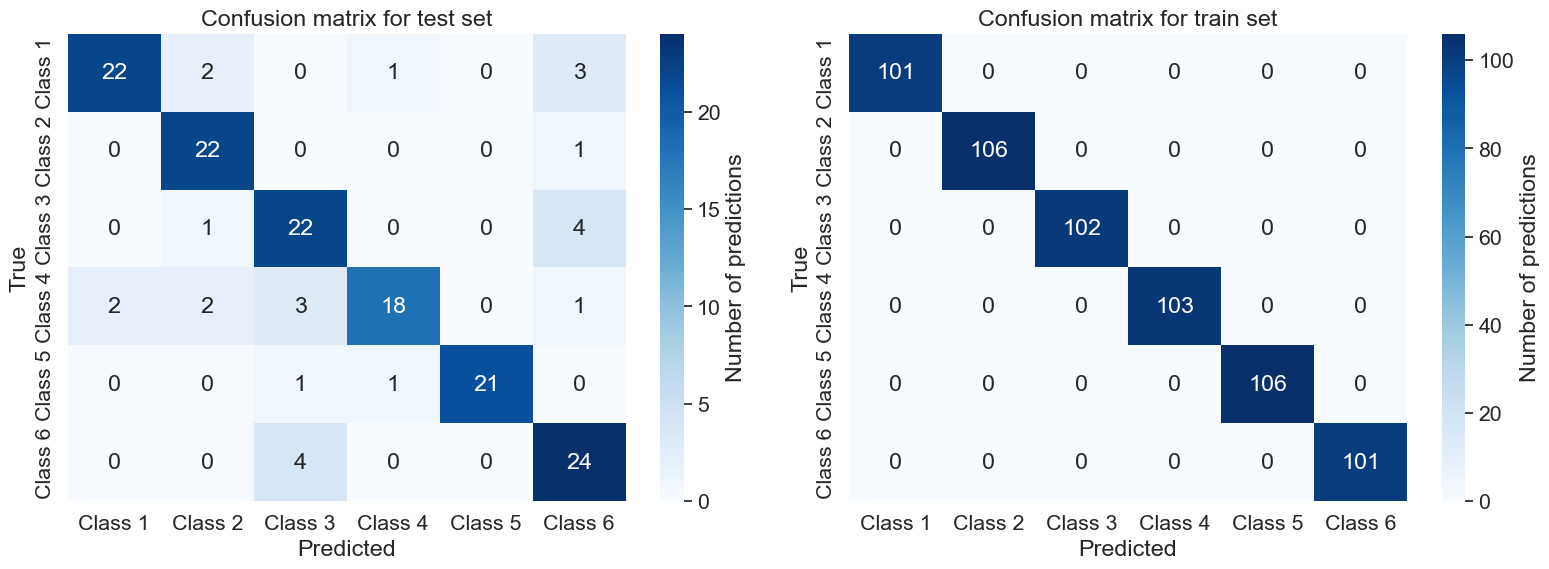

In [53]:
# Your confusion matrices
cm = confusion_matrix(y_test_minmax, y_pred_rf)
cm2 = confusion_matrix(y_train_minmax, y_pred_rf_train)

# Class labels
class_labels = [f'Class {i}' for i in range(1, 7)]

# Set up the figure size and font scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(font_scale=1.4)

# Plot the confusion matrix using a heatmap
for ax, cm_data, title in zip(axes, [cm, cm2], ['Confusion matrix for test set', 'Confusion matrix for train set']):
    sns.heatmap(cm_data, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels,
                cbar_kws={'label': 'Number of predictions'},
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

Same as SVM, the same situation occurs at class 4 that error rate increases, and the same situation occurs at class 6 that class6 is wrongly recognised as class1, 2, 3 and 4. And it is only a little bit higher than the SVM test set accuracy in the situation where the training set of the SVM model is 92% correct.

##### Summary

While the model performs well on the test set, achieving perfect performance on the training set raises concerns about overfitting. The model can achieve a maximum of 83% accuracy. It can be seen that the SVM model is more suitable in this dataset.

### Gradient Boosting

In [55]:
# Creating a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# train model
gb_model.fit(X_train_minmax, y_train_minmax)

# Predictions on the test set
y_pred_gb = gb_model.predict(X_test_minmax)
y_pred_gb_train = gb_model.predict(X_train_minmax)
# Evaluating model performance
accuracy = accuracy_score(y_test_minmax, y_pred_gb)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.65%


#### Evaluation of the model

Bootstrapping is typically not applied directly to Gradient Boosting models as they are built sequentially, and the concept of bootstrapping is more commonly associated with bagging algorithms like Random Forest.

Tried using bagging_model in combination with cross_val_score to see the situation but it took a very long time.

##### cross-validation

In [56]:
num_folds = 10
# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and obtain accuracy scores
cross_val_scores = cross_val_score(gb_model, minmax_feature, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cross_val_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"\nMean Accuracy across all folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.8462
Fold 2: Accuracy = 0.8205
Fold 3: Accuracy = 0.8718
Fold 4: Accuracy = 0.7564
Fold 5: Accuracy = 0.8701
Fold 6: Accuracy = 0.7403
Fold 7: Accuracy = 0.8052
Fold 8: Accuracy = 0.7273
Fold 9: Accuracy = 0.8442
Fold 10: Accuracy = 0.7922

Mean Accuracy across all folds: 0.8074


In [57]:
# Perform cross-validation and obtain predicted labels for each fold
predicted = cross_val_predict(gb_model, minmax_feature, y, cv=kf)
# Calculate the confusion matrix for each fold
for fold, (train_index, test_index) in enumerate(kf.split(minmax_feature), 1):
    y_test = y[test_index]
    y_pred = predicted[test_index]
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Fold {fold}:\n{confusion}")

# Note: If you also want to compute the mean confusion matrix across all folds,
# you can aggregate the individual confusion matrices and calculate the mean.

# Calculate the overall confusion matrix across all folds
overall_confusion = confusion_matrix(y, predicted)
print(f"\nOverall Confusion Matrix:\n{overall_confusion}")

Confusion Matrix for Fold 1:
[[10  3  0  0  0  1]
 [ 0 10  0  0  0  0]
 [ 0  0 13  0  0  3]
 [ 0  1  1 11  0  1]
 [ 0  0  0  1 10  0]
 [ 0  0  0  1  0 12]]
Confusion Matrix for Fold 2:
[[11  1  0  1  0  1]
 [ 0 11  0  2  0  1]
 [ 0  0  9  1  0  1]
 [ 2  1  0  9  0  0]
 [ 0  0  1  0 11  0]
 [ 0  0  1  1  0 13]]
Confusion Matrix for Fold 3:
[[12  1  0  0  0  1]
 [ 0 13  0  1  0  0]
 [ 1  0 14  1  0  0]
 [ 0  0  1  9  0  2]
 [ 0  0  0  0 16  0]
 [ 0  2  0  0  0  4]]
Confusion Matrix for Fold 4:
[[14  0  0  0  0  0]
 [ 0 10  0  0  0  3]
 [ 0  0 10  1  0  1]
 [ 1  3  4  9  1  0]
 [ 0  0  0  1 10  0]
 [ 0  0  3  1  0  6]]
Confusion Matrix for Fold 5:
[[13  0  0  0  0  0]
 [ 2  9  0  0  0  0]
 [ 0  0 12  2  0  2]
 [ 1  0  0  8  0  1]
 [ 0  0  0  0 16  0]
 [ 1  0  1  0  0  9]]
Confusion Matrix for Fold 6:
[[ 9  0  0  1  0  2]
 [ 1 10  1  2  0  0]
 [ 2  0  9  4  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  1 12  0]
 [ 2  1  0  1  0  9]]
Confusion Matrix for Fold 7:
[[12  0  0  0  0  2]
 [ 3  8  0  0 

Row 1 (C1):  

True Positives (TP): 107 instances correctly classified as C1.  
False Positives (FP):  
9 instances were misclassified as C2.  
2 instances were misclassified as C3.  
2 instances were misclassified as C4.  
9 instances were misclassified as C6.  
Row 2 (C2):  

True Positives (TP): 103 instances correctly classified as C2.  
False Positives (FP):  
9 instances were misclassified as C1.  
2 instances were misclassified as C3.  
7 instances were misclassified as C4.  
8 instances were misclassified as C6.  
Row 3 (C3):  

True Positives (TP): 97 instances correctly classified as C3.  
False Positives (FP):  
5 instances were misclassified as C1.  
1 instance was misclassified as C2.  
13 instances were misclassified as C4.  
1 instance was misclassified as C5.  
12 instances were misclassified as C6.  
Row 4 (C4):  

True Positives (TP): 91 instances correctly classified as C4.  
False Positives (FP):  
8 instances were misclassified as C1.  
9 instances were misclassified as C2.  
13 instances were misclassified as C3.  
3 instances were misclassified as C5.  
5 instances were misclassified as C6.  
Row 5 (C5):  

True Positives (TP): 124 instances correctly classified as C5.  
False Positives (FP):  
2 instances were misclassified as C1.  
3 instances were misclassified as C4.  
Row 6 (C6):  

True Positives (TP): 103 instances correctly classified as C6.  
False Positives (FP):  
5 instances were misclassified as C1.  
6 instances were misclassified as C2.  
9 instances were misclassified as C3.  
6 instances were misclassified as C4.  

##### Quantitative Performance evaluation of the model

Training and Test Accuracies

In [58]:
print("In Test set:")
print( classification_report(y_test_minmax, y_pred_gb))
print("-------------------------------------------------------")
print("In Train set:")
print( classification_report(y_train_minmax, y_pred_gb_train))

In Test set:
              precision    recall  f1-score   support

          C1       0.88      0.79      0.83        28
          C2       0.72      0.91      0.81        23
          C3       0.88      0.78      0.82        27
          C4       0.71      0.77      0.74        26
          C5       1.00      0.87      0.93        23
          C6       0.72      0.75      0.74        28

    accuracy                           0.81       155
   macro avg       0.82      0.81      0.81       155
weighted avg       0.82      0.81      0.81       155

-------------------------------------------------------
In Train set:
              precision    recall  f1-score   support

          C1       1.00      1.00      1.00       101
          C2       1.00      1.00      1.00       106
          C3       1.00      1.00      1.00       102
          C4       1.00      1.00      1.00       103
          C5       1.00      1.00      1.00       106
          C6       1.00      1.00      1.00      

1. for class C5, when the model predicts C5, it is always correct (precision of 1.00).
2. Achieving 100% accuracy on the training set raises concerns about overfitting. The model may have memorized the training data and may not generalize well to new, unseen data.
3. The gradient boosting model shows significantly more variation in the test set than the other two models, with the highest value being 1 but the lowest being 0.72. It seems that the stability of this model is not very good.

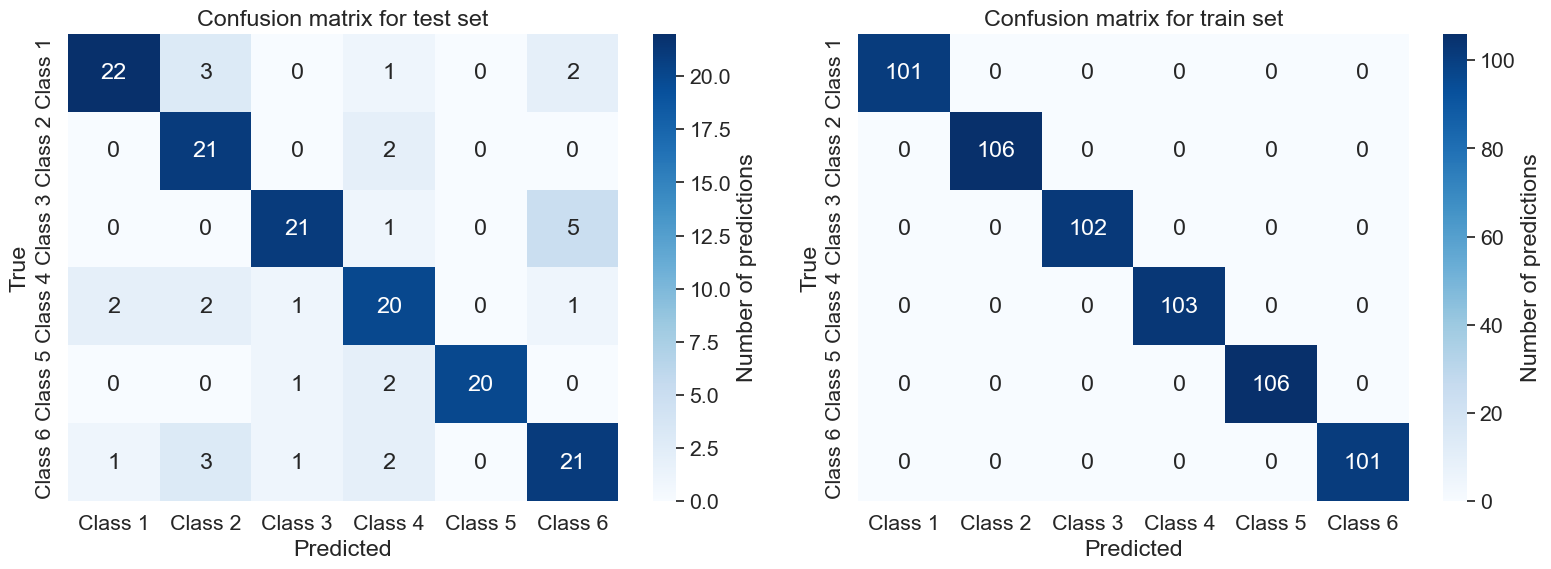

In [59]:
# Your confusion matrices
cm = confusion_matrix(y_test_minmax, y_pred_gb)
cm2 = confusion_matrix(y_train_minmax, y_pred_gb_train)

# Class labels
class_labels = [f'Class {i}' for i in range(1, 7)]

# Set up the figure size and font scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(font_scale=1.4)

# Plot the confusion matrix using a heatmap
for ax, cm_data, title in zip(axes, [cm, cm2], ['Confusion matrix for test set', 'Confusion matrix for train set']):
    sns.heatmap(cm_data, annot=True, fmt='g', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels,
                cbar_kws={'label': 'Number of predictions'},
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

#### Summary

The gradient-boosted model is the only one that does not show anything special on class 4. However, class 4 has a false judgement on every class.Moreover, the correctness of this model is lower than that of SVM and Random Forest.

### Compare three model

In [30]:
# Assuming you have trained SVM, Random Forest, and Gradient Boosting models
cm_svm = confusion_matrix(y_test_minmax, y_pred_svm2)
cm_rf = confusion_matrix(y_test_minmax, y_pred_rf)
cm_gb = confusion_matrix(y_test_minmax, y_pred_gb)
# Plot confusion matrices using seaborn heatmap
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

NameError: name 'y_pred_svm2' is not defined

Comparing the three models:
1.   the accuracy rates of all three models are not low, and all of them are above 80%.
2. SVM model has highly stable and accurate.
3. The SVM model and the Random Forest model show similar phenomena for two particular classes, class 4 and class 6.The gradient boosting model is the only one that does not show this phenomenon.
4. The Gradient Boosting model is less stable than the other two.
5. Increased accuracy will lead increased bias and the risk of overfitting. SVM increased 3% lead 6% bias increased.

### Dimensionality reduction by PCA

I wanted to improve accuracy, so I tried PCA dimensionality reduction. Since this is a high dimension array, I want to improve the accuracy by means of Feature engineering.

In [21]:
pca = PCA(n_components=0.9) # set pca function for 90% data
X_pca = pca.fit_transform(X_minmax)
X_pca


array([[ 1.16154801e+00,  3.63622001e+00, -9.75795315e-01, ...,
         1.00024617e-01, -2.80449838e-01, -1.94811590e-01],
       [ 7.80017362e-01,  3.26818490e+00,  1.47405438e-01, ...,
         1.50247321e-01, -2.39510791e-03, -6.85835402e-02],
       [ 1.58862126e+00,  2.35954796e+00,  5.94949250e-01, ...,
        -7.64758322e-02,  1.10029348e-01, -5.53039553e-02],
       ...,
       [-1.11281938e+00, -1.98491255e-01,  9.42991225e-01, ...,
        -2.62616128e-01,  1.21200379e-01, -2.48048713e-02],
       [-1.41759282e+00, -5.19089356e-01,  3.55604686e-01, ...,
        -1.86994688e-02,  5.25175926e-02, -5.95148816e-02],
       [-2.77962221e+00, -1.25810254e+00,  9.98962232e-02, ...,
         6.95112077e-02,  1.66639770e-02, -1.02308776e-01]])

In [22]:
print(pca.explained_variance_ratio_.cumsum())

[0.27613226 0.42998401 0.48988962 0.53535392 0.56860173 0.59281177
 0.61357227 0.63338041 0.64920988 0.66484264 0.67851435 0.69147948
 0.70296337 0.71420879 0.7232866  0.73165772 0.73911645 0.7464932
 0.75319979 0.75933691 0.7653407  0.77103058 0.77638704 0.78164283
 0.78654128 0.79099198 0.79530395 0.79933961 0.80312893 0.80673578
 0.81025152 0.81361282 0.8168216  0.81995923 0.82301056 0.82589529
 0.82877011 0.83155757 0.83426109 0.83681823 0.83927782 0.84160024
 0.84388731 0.84616376 0.84837848 0.85055404 0.85266725 0.85473011
 0.85670905 0.85864402 0.86055984 0.8624613  0.8643307  0.86615374
 0.86790561 0.86965333 0.87135308 0.87302697 0.8746449  0.87624155
 0.87781227 0.87936872 0.88090708 0.88239348 0.88385067 0.88527578
 0.88667428 0.88806096 0.88943738 0.89077381 0.89209327 0.89339104
 0.89465757 0.89591915 0.89715888 0.8983774  0.89957939 0.90075295]


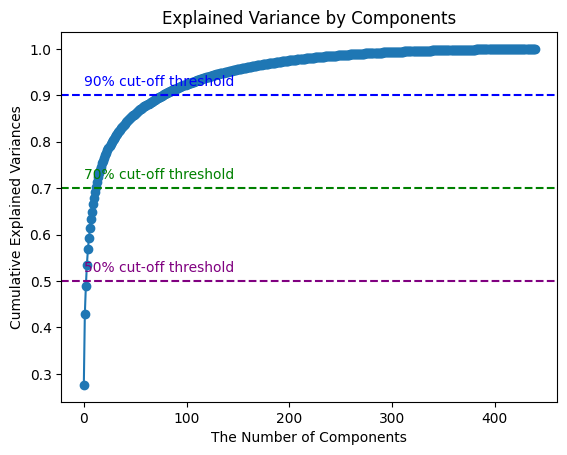

In [23]:
pca1 = PCA()
pca1.fit_transform(X_minmax)
plt.plot(pca1.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')#plot variance_sum follow the principal
plt.axhline(y=0.9, color='b', linestyle='--') # plot a line when y=1 cause this is when principal include 90% data
plt.text(0.5, 0.92, '90% cut-off threshold', color = 'blue', fontsize=10)
plt.axhline(y=0.7, color='g', linestyle='--') # plot a line when y=1 cause this is when principal include 70% data
plt.text(0.5, 0.72, '70% cut-off threshold', color = 'green', fontsize=10)
plt.axhline(y=0.5, color='purple', linestyle='--') # plot a line when y=1 cause this is when principal include 50% data
plt.text(0.5, 0.52, '50% cut-off threshold', color = 'purple', fontsize=10)
plt.title('Explained Variance by Components')
plt.xlabel("The Number of Components")
plt.ylabel("Cumulative Explained Variances" )
plt.show()

In [24]:
df_pca_components = pca1.explained_variance_ratio_.cumsum() > 0.90
Number_of_components_percentage =  440 - df_pca_components.sum()
Number_of_components_percentage

77

It need 77 features to retain 90% of the data.

In [27]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [31]:
parameters = [{'C': [0.1,1,5,10,100,1000], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}]
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=10) # 
grid_search = grid_search.fit(X_train_pca, y_train_pca)
# best params after tuning; 
print(grid_search.best_params_)
# best params after hyper-parameter tuning
print(grid_search.best_estimator_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our dataset with tuning is : {:.2f}%" .format(accuracy))

NameError: name 'svm' is not defined

The {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'} parameter achieves the best results in PCA dataset.

In [32]:
# instantiate classifier with optimal hyperparameters
svm3=SVC(C=5, gamma=0.1, kernel='rbf')
# fit classifier to training set
clf=svm3.fit(X_train_pca, y_train_pca)
# make predictions on test set
y_pred_svm3 = svm3.predict(X_test_pca)
y_pred_svm3_train = svm3.predict(X_train_pca)
# compute and print accuracy score
acc = accuracy_score(y_test_pca, y_pred_svm3) *100
# print accuracy %
print("Accuracy for our dataset in predicting test data (when using the best parameteres) is : {:.2f}%" .format(acc))

Accuracy for our dataset in predicting test data (when using the best parameteres) is : 85.81%


A very good result was obtained, close to 86% accuracy, which is a very good improvement if the model can be processed in such a way that it can achieve high accuracy but still fit well.

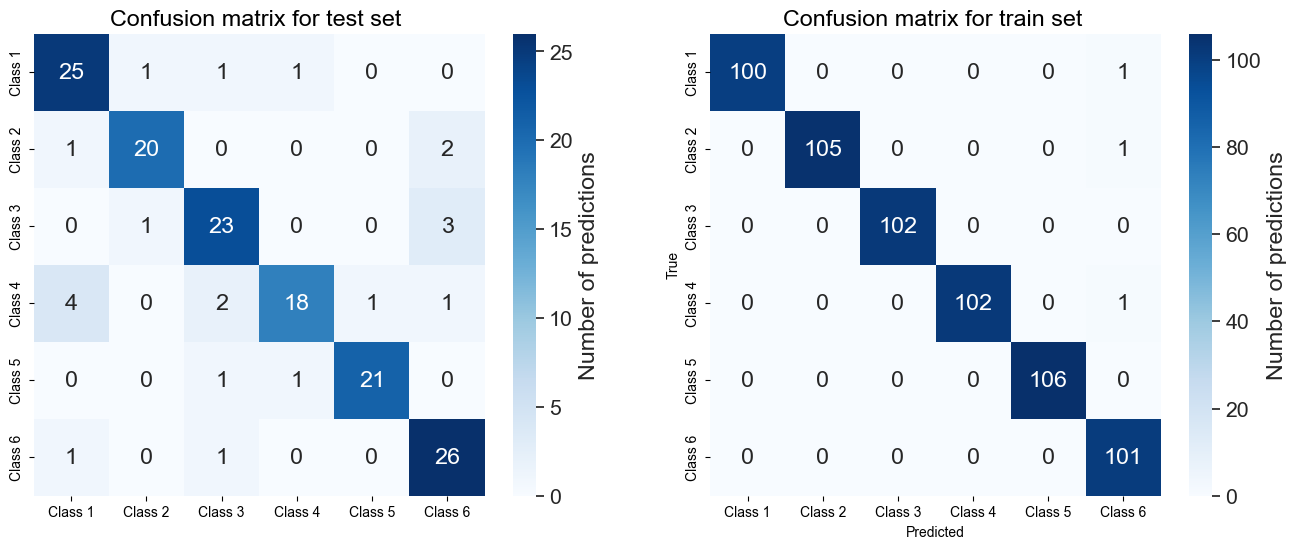

In [33]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_minmax, y_pred_svm3)
cm2 = confusion_matrix(y_train_minmax, y_pred_svm3_train)
# Set up the figure size and font scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(font_scale=1.4)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your class labels from prediction
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your true class labels 
            cbar_kws={'label': 'Number of predictions'},
            ax=axes[0])
axes[0].set_title('Confusion matrix for test set ')
plt.xlabel('Predicted')
plt.ylabel('True')


sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your class labels from prediction
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your true class labels 
            cbar_kws={'label': 'Number of predictions'},
            ax=axes[1])
axes[1].set_title('Confusion matrix for train set ')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

It can be seen that the fit of this model is lower than that of the lifted SVM model alone.

In [34]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_minmax, y_pred_svm2)
cm2 = confusion_matrix(y_test_minmax, y_pred_svm3)
# Set up the figure size and font scale
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(font_scale=1.4)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your class labels from prediction
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your true class labels 
            cbar_kws={'label': 'Number of predictions'},
            ax=axes[0])
axes[0].set_title('Confusion matrix for test set without PCA')
plt.xlabel('Predicted')
plt.ylabel('True')


sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your class labels from prediction
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],  # your true class labels 
            cbar_kws={'label': 'Number of predictions'},
            ax=axes[1])
axes[1].set_title('Confusion matrix for test set with PCA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'y_pred_svm2' is not defined

In [35]:
num_folds = 10
# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and obtain accuracy scores
cross_val_scores = cross_val_score(svm3, X_pca, y, cv=kf)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cross_val_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f"\nMean Accuracy across all folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.8846
Fold 2: Accuracy = 0.9231
Fold 3: Accuracy = 0.8462
Fold 4: Accuracy = 0.7051
Fold 5: Accuracy = 0.9091
Fold 6: Accuracy = 0.7532
Fold 7: Accuracy = 0.8701
Fold 8: Accuracy = 0.8961
Fold 9: Accuracy = 0.8571
Fold 10: Accuracy = 0.8571

Mean Accuracy across all folds: 0.8502


In [51]:
# Define the number of bootstrap iterations
num_iterations = 100

# Perform bootstrapping
accuracies = []
for _ in range(num_iterations):
    # Generate a bootstrap sample
    indices = np.random.choice(len(X_train_pca), size=len(X_pca), replace=True)
    X_bootstrap = X_train_pca[indices]
    y_bootstrap = y_train_pca[indices]
    
    # Fit the SVM classifier on the bootstrap sample
    svm3.fit(X_bootstrap, y_bootstrap)
    
    # Evaluate the classifier on the test set
    accuracy = svm3.score(X_test_pca, y_test_pca)
    accuracies.append(accuracy)

# Calculate the mean accuracy and its standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Standard deviation of accuracy: {std_accuracy:.4f}")

Mean accuracy: 0.8498
Standard deviation of accuracy: 0.0176


However, there is still a situation where there is a significant difference in class 4. Overall the accuracy rates are respectable and good.

In [112]:
print('in Testing set without PCA')
print( classification_report(y_test_minmax, y_pred_svm2))
print('in Train set without PCA')
print( classification_report(y_train_minmax, y_pred_svm2_train))
print("-------------------------------------------------")
print('in Testing set with PCA')
print( classification_report(y_test_minmax, y_pred_svm3))
print('in Train set with PCA')
print( classification_report(y_train_minmax, y_pred_svm3_train))

in Testing set without PCA
              precision    recall  f1-score   support

          C1       0.83      0.86      0.84        28
          C2       0.85      0.96      0.90        23
          C3       0.85      0.85      0.85        27
          C4       0.87      0.77      0.82        26
          C5       1.00      0.87      0.93        23
          C6       0.83      0.89      0.86        28

    accuracy                           0.86       155
   macro avg       0.87      0.87      0.87       155
weighted avg       0.87      0.86      0.86       155

in Train set without PCA
              precision    recall  f1-score   support

          C1       1.00      1.00      1.00       101
          C2       1.00      1.00      1.00       106
          C3       1.00      1.00      1.00       102
          C4       1.00      1.00      1.00       103
          C5       1.00      1.00      1.00       106
          C6       1.00      1.00      1.00       101

    accuracy             

#### Summary

I'm very happy that this reduces the level of fitting and maintains a high level of accuracy, as well as reducing the bias.But it seems to have exacerbated the situation with the class 4 problem, making it very obvious that the problem has been exposed.